In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_init = pd.read_csv("data/data_cleaned_ph2.csv")
df = pd.read_csv("data_incremental.csv")

In [3]:
df_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77218 entries, 0 to 77217
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                77218 non-null  int64  
 1   id                        77218 non-null  float64
 2   bathrooms_total           77218 non-null  float64
 3   bedrooms_extra            77218 non-null  float64
 4   bedrooms                  77218 non-null  float64
 5   stories_total             77218 non-null  float64
 6   size_interior             77218 non-null  float64
 7   building_type             77218 non-null  object 
 8   agency_name               77218 non-null  object 
 9   agency_type               77218 non-null  object 
 10  property_type             77218 non-null  object 
 11  lng                       77218 non-null  float64
 12  lat                       77218 non-null  float64
 13  ownership_type            77218 non-null  object 
 14  owners

In [4]:
df_init = df_init.drop("Unnamed: 0", axis=1)
df_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77218 entries, 0 to 77217
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        77218 non-null  float64
 1   bathrooms_total           77218 non-null  float64
 2   bedrooms_extra            77218 non-null  float64
 3   bedrooms                  77218 non-null  float64
 4   stories_total             77218 non-null  float64
 5   size_interior             77218 non-null  float64
 6   building_type             77218 non-null  object 
 7   agency_name               77218 non-null  object 
 8   agency_type               77218 non-null  object 
 9   property_type             77218 non-null  object 
 10  lng                       77218 non-null  float64
 11  lat                       77218 non-null  float64
 12  ownership_type            77218 non-null  object 
 13  ownership_type_group_ids  77218 non-null  int64  
 14  land_s

# First Glance

In [5]:
df.head()

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,26663668,24006256,2,3 + 2,1.50,NaN,House,DEERBROOK REALTY INC. - 175,Firm,Single Family,...,42.298297,Freehold,1,33.5X108.,0,https://realtor.ca/real-estate/26663668/589-br...,638469831598200000,N9C2T1,Ontario,389900.0
1,26663420,24006245,2,5 + 0,1.75,NaN,House,LC PLATINUM REALTY INC. - 525,Firm,Single Family,...,42.306257,Freehold,1,30X105,0,https://realtor.ca/real-estate/26663420/556-ra...,638469794538470000,N9B2T6,Ontario,488888.0
2,26663419,24006247,1,3 + 0,1.00,1115.0000,House,RE/MAX PREFERRED REALTY LTD.,Firm,Single Family,...,42.112007,Freehold,1,64.25X118.75,0,https://realtor.ca/real-estate/26663419/35-ber...,638469794536330000,N9V2W7,Ontario,399900.0
3,26663421,24006244,2,4 + 0,2.50,NaN,House,RE/MAX PREFERRED REALTY LTD.,Firm,Single Family,...,42.109539,Freehold,1,76XIRREG,0,https://realtor.ca/real-estate/26663421/41-lai...,638469794540600000,N9V1X6,Ontario,849999.0
4,26662882,24006215,2,3 + 2,NaN,NaN,House,ROYAL LEPAGE BINDER REAL ESTATE - 634,Firm,Single Family,...,42.277495,Freehold,1,50X106.99,0,https://realtor.ca/real-estate/26662882/2211-c...,638469760695900000,N9B3V5,Ontario,699900.0


In [6]:
df.shape

(23862, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23862 entries, 0 to 23861
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        23862 non-null  int64  
 1   id_mls                    23862 non-null  object 
 2   bathrooms_total           23862 non-null  int64  
 3   bedrooms                  23862 non-null  object 
 4   stories_total             15810 non-null  float64
 5   size_interior             12600 non-null  object 
 6   building_type             23862 non-null  object 
 7   agency_name               23862 non-null  object 
 8   agency_type               23862 non-null  object 
 9   property_type             23862 non-null  object 
 10  lng                       23862 non-null  float64
 11  lat                       23862 non-null  float64
 12  ownership_type            23862 non-null  object 
 13  ownership_type_group_ids  23862 non-null  object 
 14  land_s

In [8]:
df_with_size = df[df["size_interior"].notna()]
df_with_size

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
2,26663419,24006247,1,3 + 0,1.0,1115.0000,House,RE/MAX PREFERRED REALTY LTD.,Firm,Single Family,...,42.112007,Freehold,1,64.25X118.75,0,https://realtor.ca/real-estate/26663419/35-ber...,638469794536330000,N9V2W7,Ontario,399900.0
22,26656330,24006125,1,1 + 0,NaN,882.0000,Apartment,ROYAL LEPAGE BINDER REAL ESTATE - 640,Firm,Single Family,...,42.316147,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26656330/150-pa...,638467202432000000,N9A7A2,Ontario,284800.0
25,26655709,24006112,2,2 + 0,NaN,1405.0000,Apartment,RE/MAX PREFERRED REALTY LTD.,Firm,Single Family,...,42.102220,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26655709/247-br...,638467166531730000,N9V2H4,Ontario,759888.0
26,26655710,24006110,3,4 + 0,2.0,2050.0000,Row / Townhouse,JUMP REALTY INC.,Firm,Single Family,...,42.130995,Freehold,1,35X98,0,https://realtor.ca/real-estate/26655710/58-cal...,638467166533530000,N9V2R7,Ontario,784900.0
27,26655705,24006116,3,4 + 0,2.0,2060.0000,Row / Townhouse,JUMP REALTY INC.,Firm,Single Family,...,42.131027,Freehold,1,35X98,0,https://realtor.ca/real-estate/26655705/56-cal...,638467166520700000,N9V4C5,Ontario,774900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23856,26651867,5719,2,3,NaN,1152 sqft,House,CENTURY 21 Prospect Realty,Firm,Single Family,...,62.437025,none,none,6115,0,https://realtor.ca/real-estate/26651867/49-hor...,638466400087630000,NaN,Northwest Territories,439900.0
23857,26649555,5718,2,3,NaN,1216 sqft,House,RE/MAX North of 60,Firm,Single Family,...,62.436476,none,none,5506,0,https://realtor.ca/real-estate/26649555/145-de...,638466180237500000,NaN,Northwest Territories,409900.0
23858,26647564,5717,2,5,NaN,1056 sqft,House,COLDWELL BANKER NBS,Firm,Single Family,...,62.444044,none,none,6781,0,https://realtor.ca/real-estate/26647564/175-da...,638465635462600000,NaN,Northwest Territories,669000.0
23859,26644051,5714,2,3,NaN,1216 sqft,House,RE/MAX North of 60,Firm,Single Family,...,62.456171,none,none,9063,0,https://realtor.ca/real-estate/26644051/205-ma...,638465316195170000,X1A3W2,Northwest Territories,399900.0


In [9]:
df_with_size["province"].value_counts()

province
British Columbia           3748
Ontario                    3288
Alberta                    2399
Quebec                     1740
Saskatchewan                503
Manitoba                    495
New Brunswick               303
Newfoundland & Labrador     102
Yukon                        15
Northwest Territories         7
Name: count, dtype: int64

In [10]:
df["province"].value_counts()

province
Ontario                    10913
British Columbia            4010
Quebec                      3943
Alberta                     2595
Saskatchewan                 603
Manitoba                     594
Nova Scotia                  471
New Brunswick                428
Newfoundland & Labrador      149
Prince Edward Island         133
Yukon                         15
Northwest Territories          8
Name: count, dtype: int64

In [11]:
np.round(df.describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,23862.0,23862.0,15810.0,23862.0,23862.0,23862.0,2.386200e+04,23862.0
mean,26648601.0,2.0,2.0,-90.0,47.0,3.0,6.384660e+17,880755.0
std,9096.0,1.0,3.0,19.0,3.0,4.0,1.701462e+12,1188566.0
min,26632639.0,0.0,1.0,-135.0,42.0,0.0,6.384631e+17,1.0
25%,26640794.0,1.0,1.0,-113.0,44.0,0.0,6.384647e+17,419900.0
50%,26648732.0,2.0,2.0,-80.0,45.0,2.0,6.384658e+17,659900.0
75%,26656359.0,3.0,2.0,-77.0,49.0,4.0,6.384672e+17,999000.0
max,26664481.0,22.0,78.0,-53.0,68.0,250.0,6.384699e+17,72000000.0


# Remove Duplicates

In [12]:
len(df["id"].unique())

23850

In [13]:
ids = df["id"]
print(df[ids.isin(ids[ids.duplicated()])].sort_values("id").shape[0])
df[ids.isin(ids[ids.duplicated()])].sort_values("id")

24


,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
6907,26633157,W8149210,3,4 + 1,2.0,NaN,House,RE/MAX REAL ESTATE CENTRE INC.,Firm,Single Family,...,43.649733,Freehold,1,35.09 x 168.57 FT,6,https://realtor.ca/real-estate/26633157/118-mo...,638463603638100000,L7G6C8,Ontario,1199000.0
6905,26633157,W8149210,3,4 + 1,2.0,NaN,House,RE/MAX REAL ESTATE CENTRE INC.,Firm,Single Family,...,43.649733,Freehold,1,35.09 x 168.57 FT,6,https://realtor.ca/real-estate/26633157/118-mo...,638463603638100000,L7G6C8,Ontario,1199000.0
15439,26634960,20261273,0,0,NaN,NaN,none,VIA CAPITALE PARTENAIRES,Firm,Vacant Land,...,47.000000,none,none,5041.2 m2,0,https://realtor.ca/real-estate/26634960/ch-dou...,638463797478600000,G0X2C0,Quebec,99000.0
14637,26634960,20261273,0,0,NaN,NaN,none,VIA CAPITALE PARTENAIRES,Firm,Vacant Land,...,47.000000,none,none,5041.2 m2,0,https://realtor.ca/real-estate/26634960/ch-dou...,638463797478600000,G0X2C0,Quebec,99000.0
6507,26636633,C8151200,2,2,NaN,NaN,Apartment,PMT REALTY INC.,Firm,Single Family,...,43.709028,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26636633/2401-1...,638463971417700000,M4P0C6,Ontario,799000.0
6505,26636633,C8151200,2,2,NaN,NaN,Apartment,PMT REALTY INC.,Firm,Single Family,...,43.709028,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26636633/2401-1...,638463971417700000,M4P0C6,Ontario,799000.0
6305,26637388,X8151548,2,3 + 2,1.0,NaN,House,BOLDT REALTY INC.,Firm,Single Family,...,43.087370,Freehold,1,36.8 x 137.76 FT,5,https://realtor.ca/real-estate/26637388/6003-a...,638463977384030000,L2H2Z9,Ontario,819900.0
6306,26637388,X8151548,2,3 + 2,1.0,NaN,House,BOLDT REALTY INC.,Firm,Single Family,...,43.087370,Freehold,1,36.8 x 137.76 FT,5,https://realtor.ca/real-estate/26637388/6003-a...,638463977384030000,L2H2Z9,Ontario,819900.0
8961,26637583,X8151848,3,3 + 1,1.0,NaN,House,BALL REAL ESTATE INC.,Firm,Single Family,...,44.372250,Freehold,1,1575.97 x 2262.3 FT|50 - 100 acres,12,https://realtor.ca/real-estate/26637583/790-do...,638463981672970000,K0L2H0,Ontario,1298000.0
8960,26637583,X8151848,3,3 + 1,1.0,NaN,House,BALL REAL ESTATE INC.,Firm,Single Family,...,44.372250,Freehold,1,1575.97 x 2262.3 FT|50 - 100 acres,12,https://realtor.ca/real-estate/26637583/790-do...,638463981672970000,K0L2H0,Ontario,1298000.0


In [14]:
df[df["id"].duplicated()].sort_values("id")

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
6907,26633157,W8149210,3,4 + 1,2.0,NaN,House,RE/MAX REAL ESTATE CENTRE INC.,Firm,Single Family,...,43.649733,Freehold,1,35.09 x 168.57 FT,6,https://realtor.ca/real-estate/26633157/118-mo...,638463603638100000,L7G6C8,Ontario,1199000.0
15439,26634960,20261273,0,0,NaN,NaN,none,VIA CAPITALE PARTENAIRES,Firm,Vacant Land,...,47.000000,none,none,5041.2 m2,0,https://realtor.ca/real-estate/26634960/ch-dou...,638463797478600000,G0X2C0,Quebec,99000.0
6507,26636633,C8151200,2,2,NaN,NaN,Apartment,PMT REALTY INC.,Firm,Single Family,...,43.709028,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26636633/2401-1...,638463971417700000,M4P0C6,Ontario,799000.0
6306,26637388,X8151548,2,3 + 2,1.0,NaN,House,BOLDT REALTY INC.,Firm,Single Family,...,43.087370,Freehold,1,36.8 x 137.76 FT,5,https://realtor.ca/real-estate/26637388/6003-a...,638463977384030000,L2H2Z9,Ontario,819900.0
8961,26637583,X8151848,3,3 + 1,1.0,NaN,House,BALL REAL ESTATE INC.,Firm,Single Family,...,44.372250,Freehold,1,1575.97 x 2262.3 FT|50 - 100 acres,12,https://realtor.ca/real-estate/26637583/790-do...,638463981672970000,K0L2H0,Ontario,1298000.0
4706,26648950,C8160226,2,2 + 1,NaN,NaN,Apartment,CITYSCAPE REAL ESTATE LTD.,Firm,Single Family,...,43.771297,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26648950/203-18...,638465809789670000,M2N7H7,Ontario,949000.0
4306,26651525,E8161914,0,0,NaN,11268 sqft,none,ROYAL LEPAGE ESTATE REALTY,Firm,Vacant Land,...,43.761604,none,none,60 x 187.8 FT ; Irregular,0,https://realtor.ca/real-estate/26651525/4-adam...,638466386487230000,M1E2W8,Ontario,1.0
17612,26656557,R2861953,8,8,NaN,4393 sqft,House,Century 21 Coastal Realty Ltd.,Firm,Single Family,...,49.032170,Freehold,1,4632 sqft,6,https://realtor.ca/real-estate/26656557/1668-1...,638467227168200000,V3Z0T9,British Columbia,2398000.0
3506,26656668,H4188691,3,3,2.0,1361 sqft,Row / Townhouse,RE/MAX Escarpment Golfi Realty Inc.,Firm,Single Family,...,43.216115,Condominium,2,x|under 1/2 acre,2,https://realtor.ca/real-estate/26656668/100-st...,638467240458070000,L8K6H2,Ontario,599000.0
3106,26659713,E8167692,2,2,NaN,NaN,Apartment,RE/MAX CROSSROADS REALTY INC.,Firm,Single Family,...,43.743862,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/26659713/214-13...,638467538099970000,M1J0A9,Ontario,619000.0


In [15]:
df = df.drop_duplicates(subset="id", keep=False)

In [16]:
df[df["id"].duplicated()].sort_values("id")

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price


In [17]:
# df = df.drop(["id", "id_mls"], axis=1)

In [18]:
df.shape

(23838, 21)

# Data Preprocessing (Phase 1)

## Handling Property, Building & Ownership Types

### First Looks

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23838 entries, 0 to 23861
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        23838 non-null  int64  
 1   id_mls                    23838 non-null  object 
 2   bathrooms_total           23838 non-null  int64  
 3   bedrooms                  23838 non-null  object 
 4   stories_total             15800 non-null  float64
 5   size_interior             12594 non-null  object 
 6   building_type             23838 non-null  object 
 7   agency_name               23838 non-null  object 
 8   agency_type               23838 non-null  object 
 9   property_type             23838 non-null  object 
 10  lng                       23838 non-null  float64
 11  lat                       23838 non-null  float64
 12  ownership_type            23838 non-null  object 
 13  ownership_type_group_ids  23838 non-null  object 
 14  land_size  

In [20]:
df["ownership_type"].value_counts()

ownership_type
Freehold                  13256
none                       4156
Condominium/Strata         3977
Strata                     1523
Condominium                 525
Leasehold                   200
Freehold Condo               63
Leasehold Condo/Strata       50
Undivided Co-ownership       42
Timeshare/Fractional         13
Leasehold/Leased Land         9
Shares in Co-operative        8
Other, See Remarks            7
Unknown                       4
Cooperative                   3
Life Lease                    2
Name: count, dtype: int64

In [21]:
df["building_type"].value_counts()

building_type
House                       13487
Apartment                    4362
Row / Townhouse              2391
none                         1855
Duplex                        635
Triplex                       167
Mobile Home                   158
No Building                   153
Multi-Family                  127
Unknown                       121
Fourplex                       94
Other                          90
Manufactured Home              67
Recreational                   47
Manufactured Home/Mobile       46
Modular                        16
Commercial Mix                  9
Two Apartment House             8
Parking                         3
Commercial Apartment            2
Name: count, dtype: int64

In [22]:
df[df["building_type"] == "Other"]["ownership_type"].value_counts()

ownership_type
Freehold              69
none                  16
Condominium/Strata     4
Freehold Condo         1
Name: count, dtype: int64

In [23]:
df[df["building_type"] == "Special Purpose"]

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price


In [24]:
df["property_type"].value_counts()

property_type
Single Family    21557
Vacant Land       1786
Multi-family       324
Agriculture        135
Recreational        32
Parking              3
Business             1
Name: count, dtype: int64

In [25]:
df[df["property_type"] == "Business"]["page_url"]

22360    https://realtor.ca/real-estate/26662809/range-...
Name: page_url, dtype: object

In [26]:
df[df["property_type"] == "Other"]

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price


In [27]:
df[df["property_type"] == "Other"].info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        0 non-null      int64  
 1   id_mls                    0 non-null      object 
 2   bathrooms_total           0 non-null      int64  
 3   bedrooms                  0 non-null      object 
 4   stories_total             0 non-null      float64
 5   size_interior             0 non-null      object 
 6   building_type             0 non-null      object 
 7   agency_name               0 non-null      object 
 8   agency_type               0 non-null      object 
 9   property_type             0 non-null      object 
 10  lng                       0 non-null      float64
 11  lat                       0 non-null      float64
 12  ownership_type            0 non-null      object 
 13  ownership_type_group_ids  0 non-null      object 
 14  land_size                 0

### Property Type: Single Family

In [28]:
df_sf = df[df["property_type"] == "Single Family"]

In [29]:
df_sf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21557 entries, 0 to 23860
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        21557 non-null  int64  
 1   id_mls                    21557 non-null  object 
 2   bathrooms_total           21557 non-null  int64  
 3   bedrooms                  21557 non-null  object 
 4   stories_total             15531 non-null  float64
 5   size_interior             12355 non-null  object 
 6   building_type             21557 non-null  object 
 7   agency_name               21557 non-null  object 
 8   agency_type               21557 non-null  object 
 9   property_type             21557 non-null  object 
 10  lng                       21557 non-null  float64
 11  lat                       21557 non-null  float64
 12  ownership_type            21557 non-null  object 
 13  ownership_type_group_ids  21557 non-null  object 
 14  land_size  

In [30]:
df_sf["province"].value_counts()

province
Ontario                    10084
British Columbia            3716
Quebec                      3546
Alberta                     2365
Saskatchewan                 499
Manitoba                     497
Nova Scotia                  351
New Brunswick                293
Newfoundland & Labrador       99
Prince Edward Island          85
Yukon                         15
Northwest Territories          7
Name: count, dtype: int64

In [31]:
df_sf["building_type"].value_counts()

building_type
House                       13473
Apartment                    4357
Row / Townhouse              2391
Duplex                        553
none                          245
Mobile Home                   158
Triplex                       136
Fourplex                       70
Manufactured Home              66
Manufactured Home/Mobile       46
Recreational                   25
Modular                        16
Other                          10
Two Apartment House             8
Multi-Family                    3
Name: count, dtype: int64

In [32]:
df_sf["ownership_type"].value_counts()

ownership_type
Freehold                  12041
Condominium/Strata         3962
none                       3129
Strata                     1511
Condominium                 524
Leasehold                   192
Freehold Condo               62
Leasehold Condo/Strata       50
Undivided Co-ownership       42
Timeshare/Fractional         13
Leasehold/Leased Land         9
Shares in Co-operative        7
Other, See Remarks            6
Unknown                       4
Cooperative                   3
Life Lease                    2
Name: count, dtype: int64

In [33]:
df_sf[df_sf["ownership_type"] == "none"]

,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
43,26649760,24005991,2,4 + 2,1.0,NaN,House,RE/MAX CARE REALTY - 828,Firm,Single Family,...,42.309887,none,none,32.12X70.33,0,https://realtor.ca/real-estate/26649760/191-er...,638466231408970000,N9A3W9,Ontario,299999.0
158,26662703,24006202,3,3 + 2,NaN,NaN,House,BUCKINGHAM REALTY (WINDSOR) LTD.,Firm,Single Family,...,42.293819,none,none,60.7X129.99,0,https://realtor.ca/real-estate/26662703/375-co...,638469724599570000,N0R1A0,Ontario,699900.0
495,26660113,X8167868,2,6,2.0,NaN,Duplex,HOMELIFE LANDMARK REALTY INC.,Firm,Single Family,...,42.337246,none,none,30 x 60 FT,0,https://realtor.ca/real-estate/26660113/83-tal...,638467920042200000,N0P1A0,Ontario,399000.0
598,26651713,X8161704,4,4 + 1,2.0,NaN,House,ROYAL LEPAGE TRILAND REALTY,Firm,Single Family,...,42.520571,none,none,198 x 115 FT|1/2 - 1.99 acres,16,https://realtor.ca/real-estate/26651713/9263-f...,638466389794730000,N0L2C0,Ontario,889900.0
610,26650859,X8161430,3,6,1.0,NaN,Duplex,"EXP REALTY, BROKERAGE",Firm,Single Family,...,42.909984,none,none,127.33 x 135 FT,6,https://realtor.ca/real-estate/26650859/73-bro...,638466327716100000,N6P1A9,Ontario,879900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23856,26651867,5719,2,3,NaN,1152 sqft,House,CENTURY 21 Prospect Realty,Firm,Single Family,...,62.437025,none,none,6115,0,https://realtor.ca/real-estate/26651867/49-hor...,638466400087630000,NaN,Northwest Territories,439900.0
23857,26649555,5718,2,3,NaN,1216 sqft,House,RE/MAX North of 60,Firm,Single Family,...,62.436476,none,none,5506,0,https://realtor.ca/real-estate/26649555/145-de...,638466180237500000,NaN,Northwest Territories,409900.0
23858,26647564,5717,2,5,NaN,1056 sqft,House,COLDWELL BANKER NBS,Firm,Single Family,...,62.444044,none,none,6781,0,https://realtor.ca/real-estate/26647564/175-da...,638465635462600000,NaN,Northwest Territories,669000.0
23859,26644051,5714,2,3,NaN,1216 sqft,House,RE/MAX North of 60,Firm,Single Family,...,62.456171,none,none,9063,0,https://realtor.ca/real-estate/26644051/205-ma...,638465316195170000,X1A3W2,Northwest Territories,399900.0


In [34]:
df_sf[df_sf["ownership_type"] == "none"]["page_url"]

43       https://realtor.ca/real-estate/26649760/191-er...
158      https://realtor.ca/real-estate/26662703/375-co...
495      https://realtor.ca/real-estate/26660113/83-tal...
598      https://realtor.ca/real-estate/26651713/9263-f...
610      https://realtor.ca/real-estate/26650859/73-bro...
                               ...                        
23856    https://realtor.ca/real-estate/26651867/49-hor...
23857    https://realtor.ca/real-estate/26649555/145-de...
23858    https://realtor.ca/real-estate/26647564/175-da...
23859    https://realtor.ca/real-estate/26644051/205-ma...
23860    https://realtor.ca/real-estate/26644052/4-ball...
Name: page_url, Length: 3129, dtype: object

In [35]:
df_sf[df_sf["building_type"] == "Modular"]["page_url"]

592     https://realtor.ca/real-estate/26652016/22790-...
823     https://realtor.ca/real-estate/26633499/217-ma...
1132    https://realtor.ca/real-estate/26638793/3033-t...
1240    https://realtor.ca/real-estate/26661476/9338-r...
1418    https://realtor.ca/real-estate/26635763/231-pe...
1445    https://realtor.ca/real-estate/26664332/10-elm...
1448    https://realtor.ca/real-estate/26664328/107-pa...
1703    https://realtor.ca/real-estate/26655489/41-ced...
2005    https://realtor.ca/real-estate/26647249/580-be...
7462    https://realtor.ca/real-estate/26635900/5007-h...
7961    https://realtor.ca/real-estate/26657457/6-weep...
7963    https://realtor.ca/real-estate/26657342/15-haw...
8903    https://realtor.ca/real-estate/26644483/36-cre...
9130    https://realtor.ca/real-estate/26649706/90-hut...
9319    https://realtor.ca/real-estate/26655301/3753a-...
9870    https://realtor.ca/real-estate/26660706/45-tow...
Name: page_url, dtype: object

In [36]:
crosstab_building_type = pd.crosstab(df_sf["province"], df_sf["building_type"])
crosstab_building_type

building_type,Apartment,Duplex,Fourplex,House,Manufactured Home,Manufactured Home/Mobile,Mobile Home,Modular,Multi-Family,Other,Recreational,Row / Townhouse,Triplex,Two Apartment House,none
province,,,,,,,,,,,,,,,
Alberta,458,213,0,1361,4,28,30,0,0,0,4,264,2,0,1
British Columbia,1132,112,2,1821,60,18,17,0,0,0,5,538,4,0,7
Manitoba,41,12,0,414,0,0,9,0,0,2,0,19,0,0,0
New Brunswick,0,0,0,266,0,0,8,0,0,0,0,14,0,0,5
Newfoundland & Labrador,0,0,0,84,0,0,3,0,3,0,0,0,0,8,1
Northwest Territories,0,0,0,6,1,0,0,0,0,0,0,0,0,0,0
Nova Scotia,23,1,0,287,0,0,12,0,0,0,13,12,0,0,3
Ontario,1792,42,12,6557,0,0,46,16,0,8,0,1418,12,0,181
Prince Edward Island,5,3,0,67,0,0,4,0,0,0,3,2,0,0,1


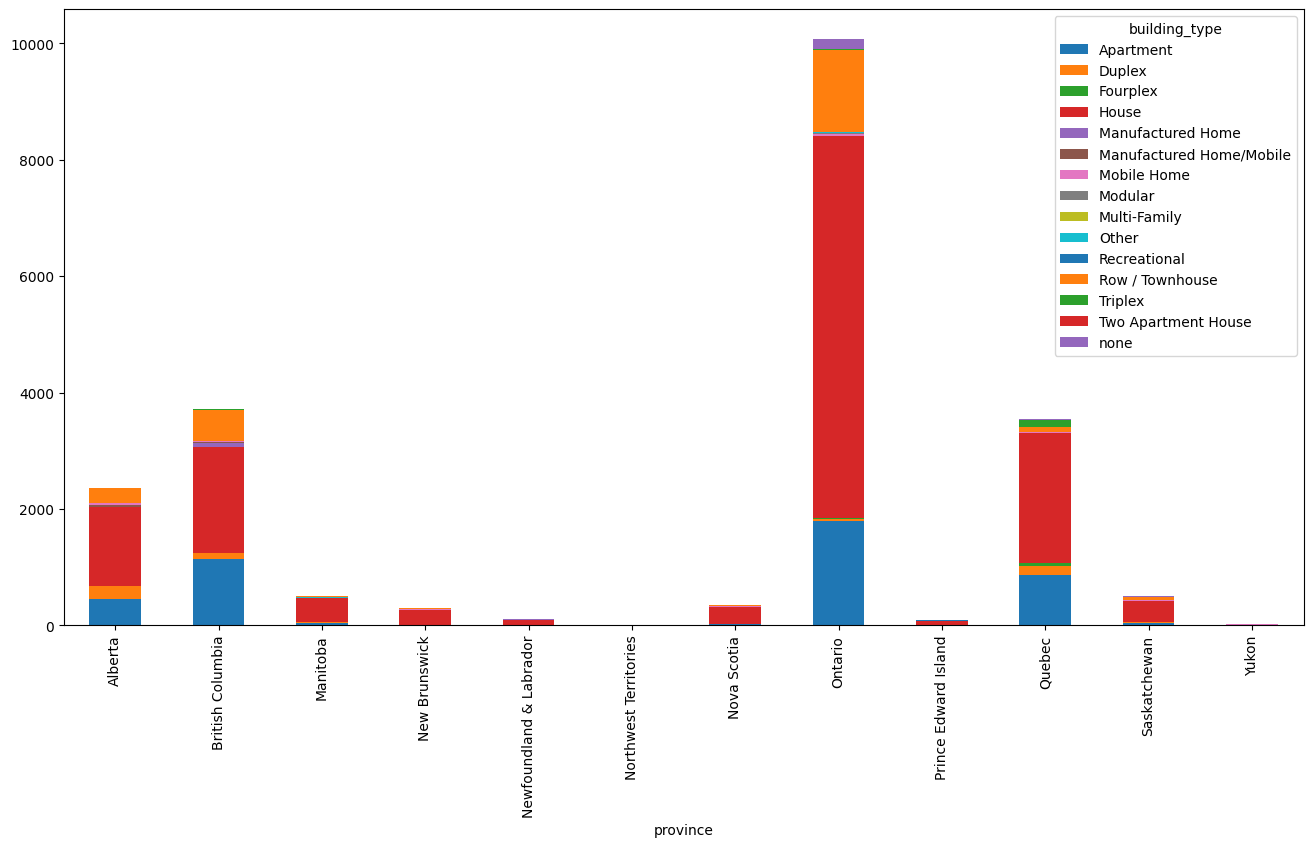

In [37]:
crosstab_building_type.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

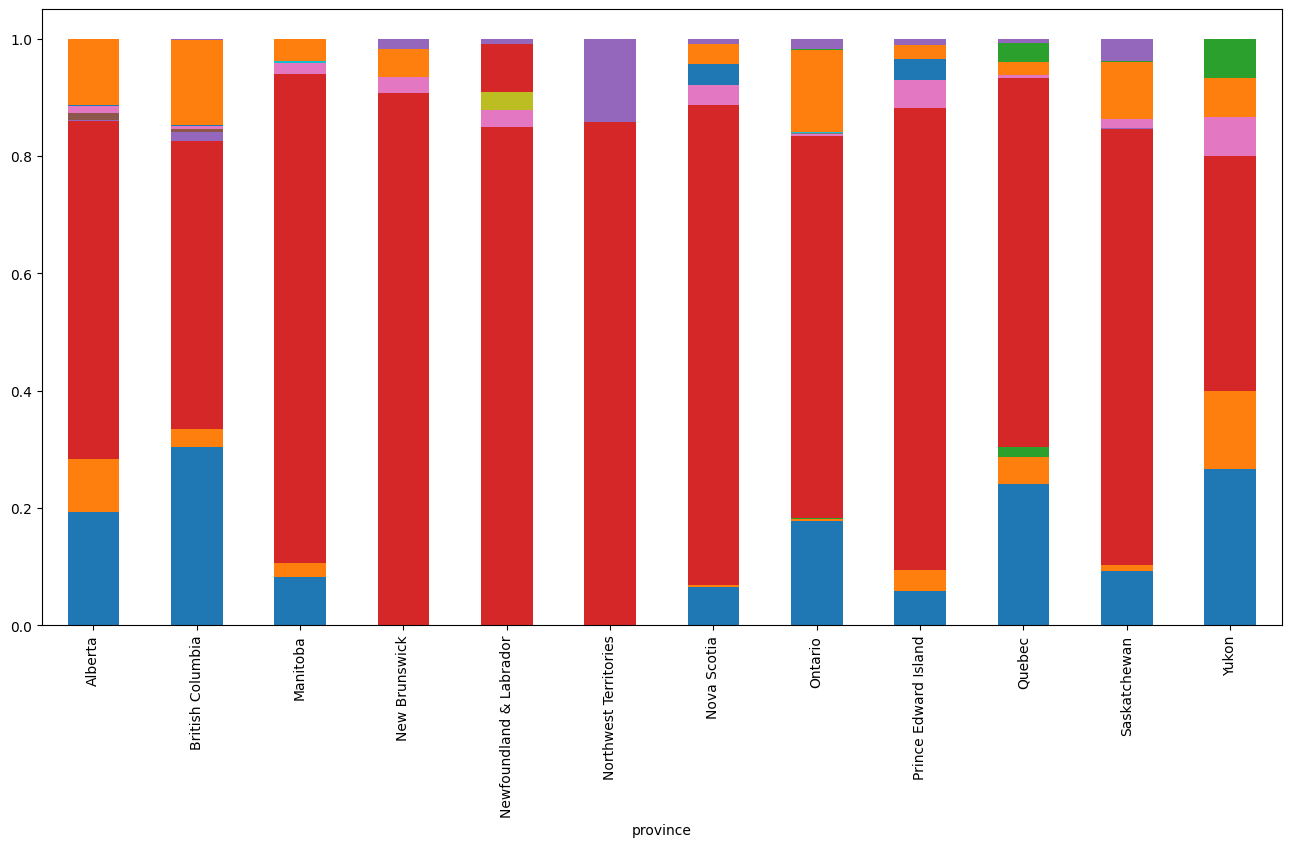

In [38]:
crosstab_building_type_norm = crosstab_building_type.div(crosstab_building_type.sum(1), axis=0)
crosstab_building_type_norm.plot(kind="bar", stacked=True, figsize=(16,8), legend=None)
plt.show()

In [39]:
crosstab_ownership_type = pd.crosstab(df_sf["province"], df_sf["ownership_type"])
crosstab_ownership_type

ownership_type,Condominium,Condominium/Strata,Cooperative,Freehold,Freehold Condo,Leasehold,Leasehold Condo/Strata,Leasehold/Leased Land,Life Lease,"Other, See Remarks",Shares in Co-operative,Strata,Timeshare/Fractional,Undivided Co-ownership,Unknown,none
province,,,,,,,,,,,,,,,,
Alberta,0,741,0,1500,0,7,0,0,0,0,0,0,0,0,0,117
British Columbia,0,206,0,1807,0,108,48,9,0,4,5,1511,5,0,3,10
Manitoba,0,1,0,427,62,6,0,0,0,0,0,0,0,0,1,0
New Brunswick,0,8,0,201,0,8,0,0,0,0,0,0,0,0,0,76
Newfoundland & Labrador,1,0,0,96,0,0,0,0,0,0,0,0,0,0,0,2
Northwest Territories,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7
Nova Scotia,0,33,0,309,0,7,0,0,0,0,0,0,2,0,0,0
Ontario,523,1958,3,7227,0,48,2,0,2,2,2,0,6,2,0,309
Prince Edward Island,0,9,0,75,0,0,0,0,0,0,0,0,0,1,0,0


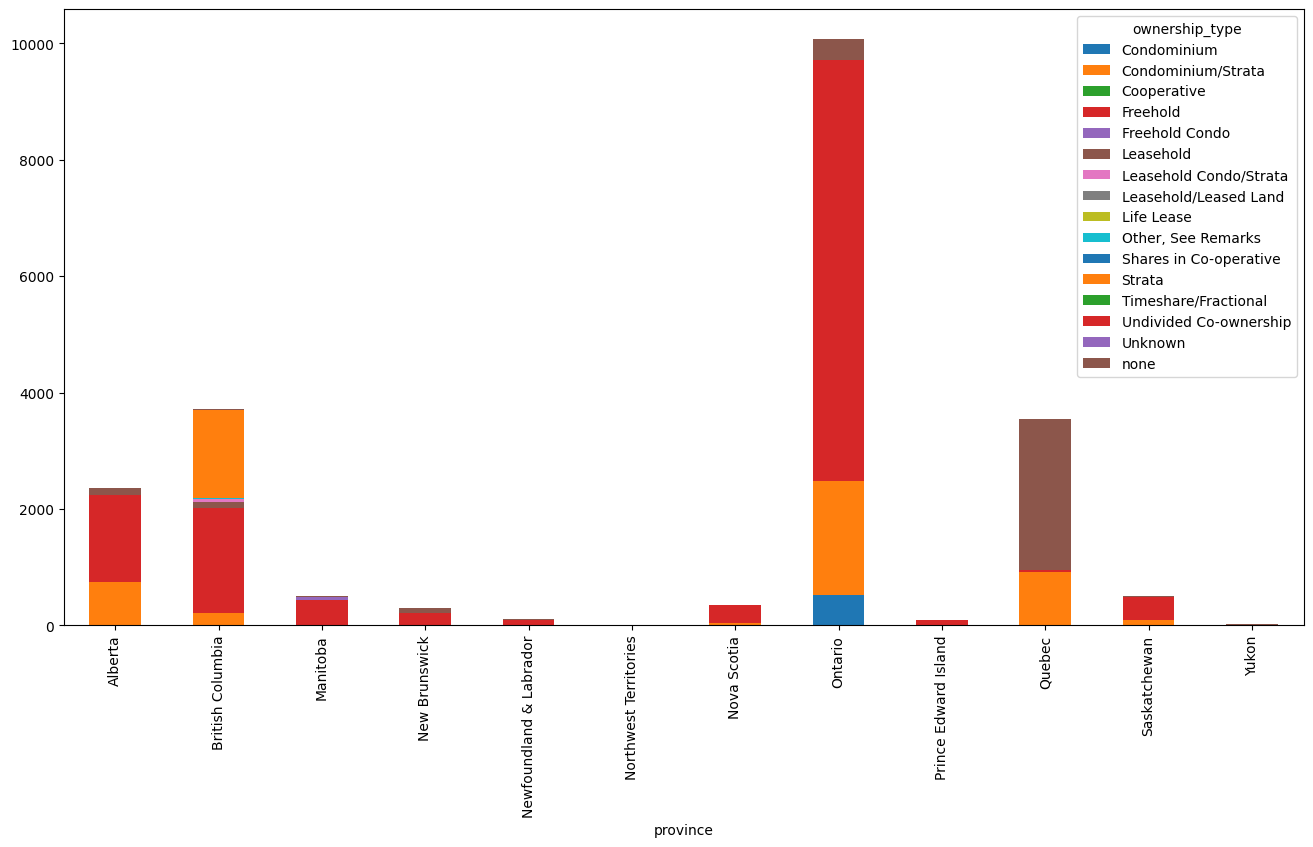

In [40]:
crosstab_ownership_type.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

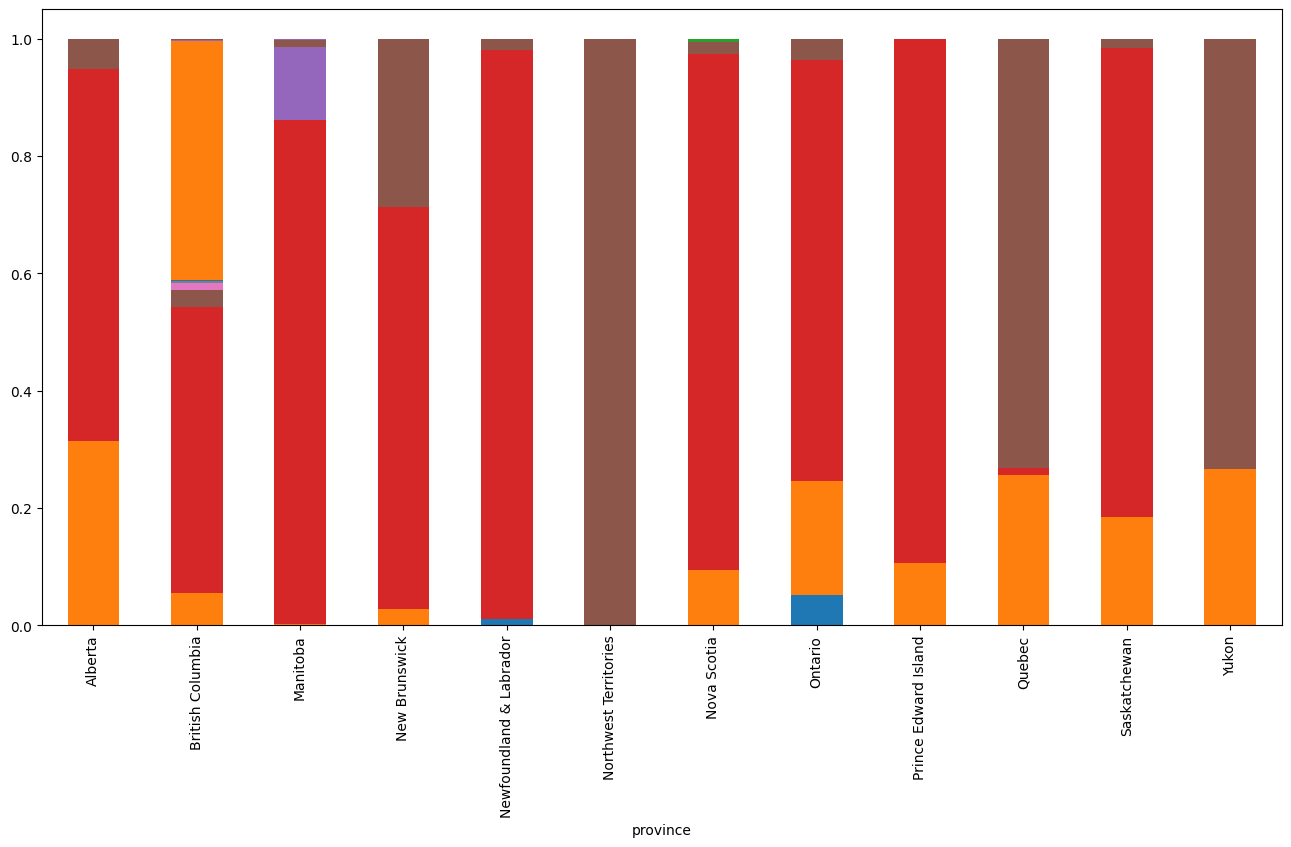

In [41]:
crosstab_ownership_type_norm = crosstab_ownership_type.div(crosstab_building_type.sum(1), axis=0)
crosstab_ownership_type_norm.plot(kind="bar", stacked=True, figsize=(16,8), legend=None)
plt.show()

### Building Type: House, Apartment, Row / Town House

In [42]:
df_app = df_sf[df_sf["building_type"] == "Apartment"]
df_app["ownership_type"].value_counts()

ownership_type
Condominium/Strata        2931
Strata                     948
Condominium                326
Undivided Co-ownership      42
Freehold Condo              35
Leasehold Condo/Strata      33
Freehold                    20
none                         6
Leasehold                    5
Timeshare/Fractional         5
Shares in Co-operative       3
Cooperative                  2
Other, See Remarks           1
Name: count, dtype: int64

In [43]:
df_dup = df_sf[df_sf["building_type"] == "Duplex"]
df_dup["ownership_type"].value_counts()

ownership_type
Freehold              246
none                  200
Strata                 59
Condominium/Strata     46
Leasehold               2
Name: count, dtype: int64

In [44]:
crosstab_ot_bt = pd.crosstab(df_sf["ownership_type"], df_sf["building_type"])
crosstab_ot_bt

building_type,Apartment,Duplex,Fourplex,House,Manufactured Home,Manufactured Home/Mobile,Mobile Home,Modular,Multi-Family,Other,Recreational,Row / Townhouse,Triplex,Two Apartment House,none
ownership_type,,,,,,,,,,,,,,,
Condominium,326,0,0,14,0,0,0,1,0,0,0,178,0,0,5
Condominium/Strata,2931,46,0,62,0,2,0,0,0,4,3,879,0,0,35
Cooperative,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0
Freehold,20,246,2,10741,9,38,32,4,3,1,16,864,7,8,50
Freehold Condo,35,0,0,11,0,0,0,0,0,1,0,15,0,0,0
Leasehold,5,2,0,62,48,4,51,11,0,0,1,5,0,0,3
Leasehold Condo/Strata,33,0,0,1,1,1,0,0,0,0,0,12,0,0,2
Leasehold/Leased Land,0,0,0,3,1,0,0,0,0,0,0,5,0,0,0
Life Lease,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0


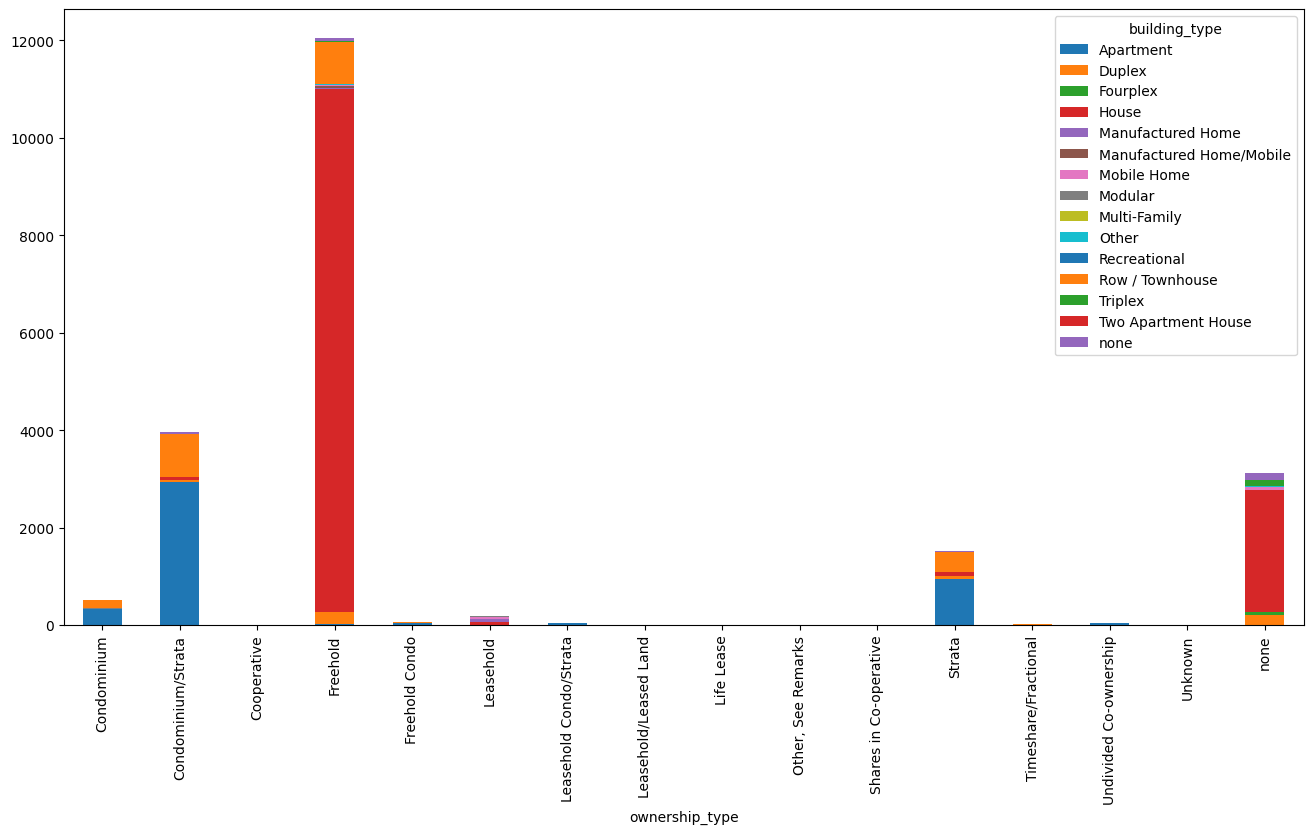

In [45]:
crosstab_ot_bt.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

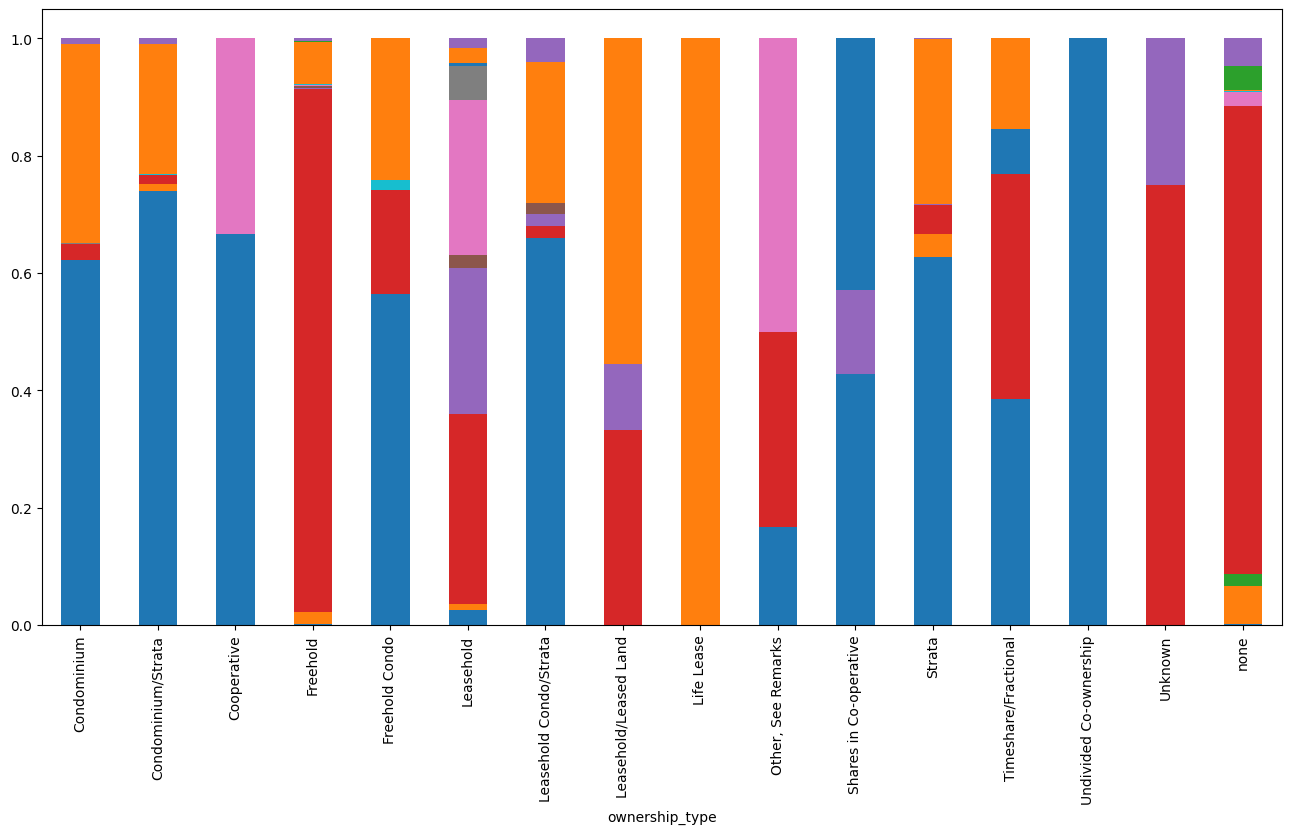

In [46]:
crosstab_ot_bt_norm = crosstab_ot_bt.div(crosstab_ot_bt.sum(1), axis=0)
crosstab_ot_bt_norm.plot(kind="bar", stacked=True, figsize=(16,8), legend=None)
plt.show()

In [47]:
np.round(df_sf[df_sf["building_type"] == "Duplex"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,553.0,553.0,342.0,553.0,553.0,553.0,5.530000e+02,553.0
mean,26649878.0,2.0,2.0,-100.0,49.0,2.0,6.384662e+17,683289.0
std,9182.0,1.0,0.0,21.0,3.0,2.0,1.732446e+12,457396.0
min,26632641.0,0.0,1.0,-135.0,42.0,0.0,6.384631e+17,89500.0
25%,26642205.0,1.0,2.0,-114.0,46.0,0.0,6.384648e+17,385000.0
50%,26650329.0,2.0,2.0,-114.0,49.0,2.0,6.384663e+17,569000.0
75%,26658161.0,3.0,2.0,-74.0,51.0,4.0,6.384673e+17,829000.0
max,26664443.0,7.0,3.0,-62.0,61.0,21.0,6.384699e+17,4900000.0


In [48]:
np.round(df_sf[df_sf["building_type"] == "Triplex"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,136.0,136.0,63.0,136.0,136.0,136.0,1.360000e+02,136.0
mean,26649829.0,2.0,2.0,-77.0,46.0,3.0,6.384662e+17,848988.0
std,8986.0,1.0,1.0,11.0,2.0,3.0,1.738111e+12,522964.0
min,26632653.0,1.0,1.0,-135.0,43.0,0.0,6.384631e+17,185000.0
25%,26643348.0,1.0,2.0,-74.0,45.0,0.0,6.384649e+17,515000.0
50%,26649182.0,1.0,2.0,-74.0,46.0,2.0,6.384659e+17,807500.0
75%,26659012.0,2.0,3.0,-73.0,46.0,5.0,6.384674e+17,996000.0
max,26664202.0,6.0,3.0,-70.0,61.0,16.0,6.384699e+17,3495000.0


In [49]:
np.round(df_sf[df_sf["building_type"] == "Fourplex"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,70.0,70.0,42.0,70.0,70.0,70.0,7.000000e+01,70.0
mean,26649631.0,2.0,2.0,-75.0,46.0,4.0,6.384661e+17,978857.0
std,8271.0,2.0,0.0,8.0,1.0,4.0,1.438795e+12,793068.0
min,26633043.0,0.0,1.0,-117.0,43.0,0.0,6.384634e+17,225000.0
25%,26642452.0,1.0,2.0,-74.0,45.0,0.0,6.384648e+17,569000.0
50%,26648914.0,1.0,2.0,-74.0,46.0,3.0,6.384658e+17,799900.0
75%,26657784.0,1.0,2.0,-73.0,46.0,6.0,6.384673e+17,1144878.0
max,26663010.0,13.0,3.0,-71.0,51.0,18.0,6.384698e+17,4895000.0


In [50]:
np.round(df_sf[df_sf["building_type"] == "Row / Townhouse"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,2391.0,2391.0,1738.0,2391.0,2391.0,2391.0,2.391000e+03,2391.0
mean,26648259.0,3.0,2.0,-93.0,46.0,2.0,6.384659e+17,764051.0
std,8803.0,1.0,1.0,20.0,3.0,2.0,1.620850e+12,398143.0
min,26632642.0,0.0,1.0,-135.0,42.0,0.0,6.384631e+17,94900.0
25%,26640783.0,2.0,2.0,-114.0,44.0,1.0,6.384647e+17,549900.0
50%,26648338.0,3.0,2.0,-80.0,44.0,2.0,6.384657e+17,724888.0
75%,26655481.0,3.0,3.0,-79.0,49.0,2.0,6.384671e+17,899850.0
max,26664444.0,6.0,4.0,-63.0,61.0,44.0,6.384699e+17,8498000.0


In [51]:
df_sd = df_sf.replace(["Duplex", "Triplex", "Fourplex"], "Semi-Detached")
df_sd["building_type"].value_counts()

building_type
House                       13473
Apartment                    4357
Row / Townhouse              2391
Semi-Detached                 759
none                          245
Mobile Home                   158
Manufactured Home              66
Manufactured Home/Mobile       46
Recreational                   25
Modular                        16
Other                          10
Two Apartment House             8
Multi-Family                    3
Name: count, dtype: int64

In [52]:
# Building Type: House, Apartment, Town House
df_bt = df_sd[(df_sd["building_type"] == "House") | 
              (df_sd["building_type"] == "Apartment") |
              (df_sd["building_type"] == "Semi-Detached") |
              (df_sd["building_type"] == "Row / Townhouse")]
df_bt["building_type"].value_counts()

building_type
House              13473
Apartment           4357
Row / Townhouse     2391
Semi-Detached        759
Name: count, dtype: int64

In [53]:
df_bt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20980 entries, 0 to 23860
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        20980 non-null  int64  
 1   id_mls                    20980 non-null  object 
 2   bathrooms_total           20980 non-null  int64  
 3   bedrooms                  20980 non-null  object 
 4   stories_total             15156 non-null  float64
 5   size_interior             11949 non-null  object 
 6   building_type             20980 non-null  object 
 7   agency_name               20980 non-null  object 
 8   agency_type               20980 non-null  object 
 9   property_type             20980 non-null  object 
 10  lng                       20980 non-null  float64
 11  lat                       20980 non-null  float64
 12  ownership_type            20980 non-null  object 
 13  ownership_type_group_ids  20980 non-null  object 
 14  land_size  

In [54]:
df_bt["province"].value_counts()

province
Ontario                    9833
British Columbia           3609
Quebec                     3499
Alberta                    2298
Manitoba                    486
Saskatchewan                471
Nova Scotia                 323
New Brunswick               280
Newfoundland & Labrador      84
Prince Edward Island         77
Yukon                        14
Northwest Territories         6
Name: count, dtype: int64

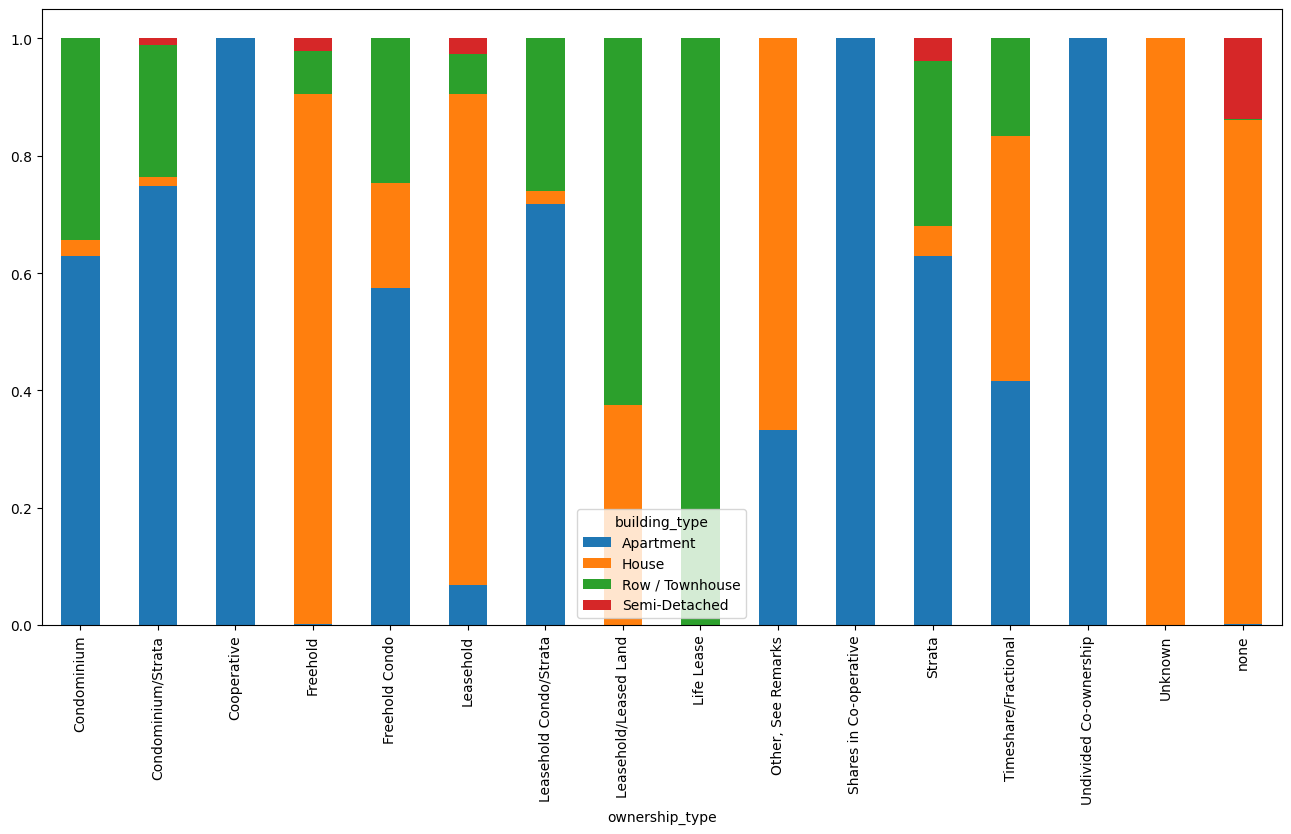

In [55]:
crosstab_ot_bt = pd.crosstab(df_bt["ownership_type"], df_bt["building_type"])
crosstab_ot_bt_norm = crosstab_ot_bt.div(crosstab_ot_bt.sum(1), axis=0)
crosstab_ot_bt_norm.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

### Ownership Type ID: Freehold, Strata / Condo, Other Types

In [56]:
df_bt["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
1          11880
2           6053
none        2906
4             82
1 2           42
3             12
1 2 3 4        3
2 3            2
Name: count, dtype: int64

In [57]:
df_bt[df_bt["building_type"] == "House"]["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
1          10741
none        2495
2            164
4             65
3              5
1 2 3 4        3
Name: count, dtype: int64

In [58]:
df_bt[df_bt["building_type"] == "Apartment"]["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
2       4276
1 2       42
1         20
none       9
4          5
3          5
Name: count, dtype: int64

In [59]:
df_bt[df_bt["building_type"] == "Semi-Detached"]["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
none    397
1       255
2       105
4         2
Name: count, dtype: int64

In [60]:
df_bt[df_bt["building_type"] == "Row / Townhouse"]["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
2       1508
1        864
4         10
none       5
2 3        2
3          2
Name: count, dtype: int64

In [61]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "1"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,11880.0,11880.0,9648.0,11880.0,11880.0,11880.0,1.188000e+04,11880.0
mean,26648515.0,3.0,2.0,-91.0,46.0,3.0,6.384660e+17,1057415.0
std,9037.0,1.0,1.0,19.0,4.0,4.0,1.684326e+12,1017588.0
min,26632640.0,0.0,1.0,-130.0,42.0,0.0,6.384631e+17,1.0
25%,26640805.0,2.0,1.0,-113.0,44.0,0.0,6.384647e+17,559900.0
50%,26648682.0,3.0,2.0,-80.0,45.0,3.0,6.384658e+17,820000.0
75%,26656148.0,4.0,2.0,-79.0,49.0,5.0,6.384672e+17,1249000.0
max,26664481.0,15.0,44.0,-53.0,59.0,60.0,6.384699e+17,28888000.0


In [62]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "none"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,2906.0,2906.0,2623.0,2906.0,2906.0,2906.0,2.906000e+03,2906.0
mean,26649369.0,2.0,2.0,-75.0,46.0,4.0,6.384662e+17,672613.0
std,9131.0,1.0,1.0,9.0,2.0,4.0,1.730300e+12,757824.0
min,26632653.0,0.0,1.0,-135.0,42.0,0.0,6.384631e+17,49900.0
25%,26641482.0,1.0,1.0,-74.0,45.0,2.0,6.384647e+17,369900.0
50%,26649222.0,2.0,2.0,-74.0,46.0,4.0,6.384659e+17,525000.0
75%,26657666.0,2.0,2.0,-73.0,46.0,6.0,6.384673e+17,764975.0
max,26664397.0,13.0,3.0,-54.0,62.0,108.0,6.384699e+17,25900000.0


In [63]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "3"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,12.0,12.0,6.0,12.0,12.0,12.0,1.200000e+01,12.0
mean,26644798.0,2.0,2.0,-92.0,46.0,1.0,6.384655e+17,194968.0
std,10379.0,1.0,1.0,24.0,2.0,1.0,1.819229e+12,213332.0
min,26633422.0,1.0,1.0,-124.0,45.0,0.0,6.384637e+17,39900.0
25%,26635781.0,2.0,1.0,-123.0,45.0,0.0,6.384639e+17,78500.0
50%,26641824.0,2.0,2.0,-79.0,45.0,0.0,6.384650e+17,110509.0
75%,26655379.0,3.0,2.0,-79.0,48.0,1.0,6.384671e+17,167975.0
max,26661835.0,4.0,2.0,-64.0,50.0,2.0,6.384691e+17,649900.0


In [64]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "4"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,82.0,82.0,66.0,82.0,82.0,82.0,8.200000e+01,82.0
mean,26647637.0,2.0,2.0,-107.0,48.0,2.0,6.384658e+17,550841.0
std,8669.0,1.0,1.0,19.0,3.0,2.0,1.535142e+12,338289.0
min,26632650.0,0.0,1.0,-125.0,42.0,0.0,6.384631e+17,144369.0
25%,26641106.0,1.0,1.0,-122.0,46.0,0.0,6.384647e+17,249925.0
50%,26646976.0,2.0,1.0,-119.0,49.0,0.0,6.384656e+17,498950.0
75%,26654218.0,3.0,2.0,-82.0,50.0,3.0,6.384666e+17,773725.0
max,26663014.0,6.0,3.0,-66.0,55.0,6.0,6.384698e+17,1695000.0


In [65]:
np.round(df_bt[df_bt["ownership_type_group_ids"] == "1 2 3 4"].describe())

,id,bathrooms_total,stories_total,lng,lat,parkings,timestamp,price
count,3.0,3.0,1.0,3.0,3.0,3.0,3.000000e+00,3.0
mean,26654995.0,2.0,1.0,-114.0,50.0,0.0,6.384674e+17,1346300.0
std,7138.0,1.0,NaN,16.0,1.0,0.0,2.110720e+12,1692399.0
min,26649112.0,1.0,1.0,-124.0,49.0,0.0,6.384658e+17,244900.0
25%,26651024.0,1.0,1.0,-124.0,49.0,0.0,6.384662e+17,371950.0
50%,26652936.0,1.0,1.0,-123.0,50.0,0.0,6.384665e+17,499000.0
75%,26657936.0,2.0,1.0,-110.0,50.0,0.0,6.384681e+17,1897000.0
max,26662936.0,3.0,1.0,-96.0,51.0,0.0,6.384698e+17,3295000.0


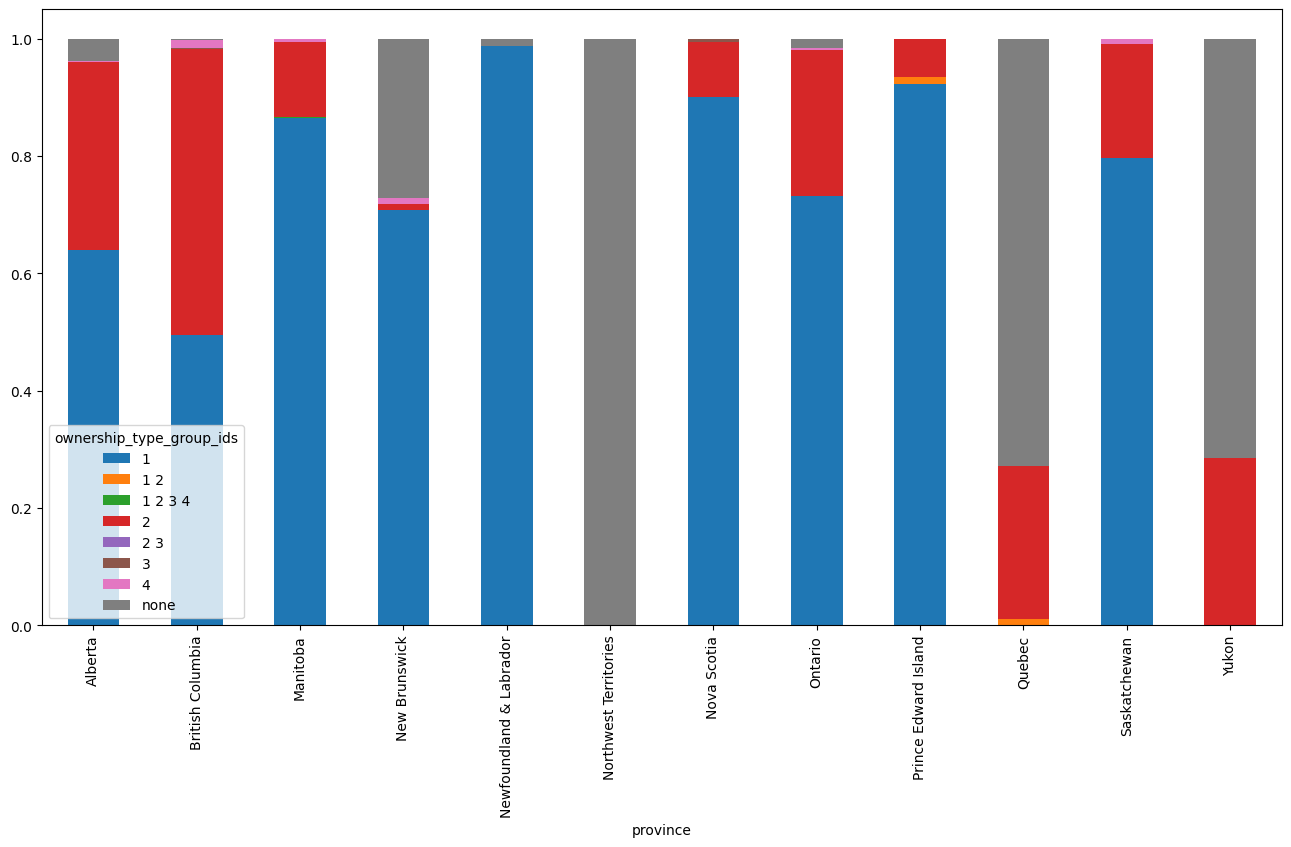

In [66]:
crosstab_oti_province = pd.crosstab(df_bt["province"], df_bt["ownership_type_group_ids"])
crosstab_oti_province_norm = crosstab_oti_province.div(crosstab_oti_province.sum(1), axis=0)
crosstab_oti_province_norm.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

In [67]:
mask_other = (df_bt["ownership_type_group_ids"] == "none")
df_oti = df_bt.copy(deep=True)
df_oti.loc[mask_other, "ownership_type_group_ids"] = "0"
df_oti["ownership_type_group_ids"].value_counts()

ownership_type_group_ids
1          11880
2           6053
0           2906
4             82
1 2           42
3             12
1 2 3 4        3
2 3            2
Name: count, dtype: int64

In [68]:
df_oti_new = df_oti[(df_oti["ownership_type_group_ids"] == "1") | 
                    (df_oti["ownership_type_group_ids"] == "2") |
                    (df_oti["ownership_type_group_ids"] == "0")]

df_oti_new["ownership_type_group_ids"].value_counts()

# 1: Freehold
# 2: Strata / Condo
# 3: Other

ownership_type_group_ids
1    11880
2     6053
0     2906
Name: count, dtype: int64

In [69]:
df_oti_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20839 entries, 0 to 23860
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        20839 non-null  int64  
 1   id_mls                    20839 non-null  object 
 2   bathrooms_total           20839 non-null  int64  
 3   bedrooms                  20839 non-null  object 
 4   stories_total             15045 non-null  float64
 5   size_interior             11816 non-null  object 
 6   building_type             20839 non-null  object 
 7   agency_name               20839 non-null  object 
 8   agency_type               20839 non-null  object 
 9   property_type             20839 non-null  object 
 10  lng                       20839 non-null  float64
 11  lat                       20839 non-null  float64
 12  ownership_type            20839 non-null  object 
 13  ownership_type_group_ids  20839 non-null  object 
 14  land_size  

In [70]:
df_oti_new["province"].value_counts()

province
Ontario                    9803
British Columbia           3553
Quebec                     3460
Alberta                    2296
Manitoba                    482
Saskatchewan                467
Nova Scotia                 321
New Brunswick               277
Newfoundland & Labrador      84
Prince Edward Island         76
Yukon                        14
Northwest Territories         6
Name: count, dtype: int64

In [71]:
# DROP UNNECESSARY COLUMNS !!!

## Converting "Bedrooms" to Number

In [72]:
df = df_oti_new

In [73]:
df["bedrooms"].str.contains("\+").value_counts()

<>:1: SyntaxWarning: invalid escape sequence '\+'
<>:1: SyntaxWarning: invalid escape sequence '\+'
/tmp/ipykernel_6399/1959575819.py:1: SyntaxWarning: invalid escape sequence '\+'
  df["bedrooms"].str.contains("\+").value_counts()


bedrooms
False    12788
True      8051
Name: count, dtype: int64

In [74]:
df.shape

(20839, 21)

In [75]:
df[df["bedrooms"].str.contains("\+")].head()

<>:1: SyntaxWarning: invalid escape sequence '\+'
<>:1: SyntaxWarning: invalid escape sequence '\+'
/tmp/ipykernel_6399/553941688.py:1: SyntaxWarning: invalid escape sequence '\+'
  df[df["bedrooms"].str.contains("\+")].head()


,id,id_mls,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,property_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,26663668,24006256,2,3 + 2,1.50,NaN,House,DEERBROOK REALTY INC. - 175,Firm,Single Family,...,42.298297,Freehold,1,33.5X108.,0,https://realtor.ca/real-estate/26663668/589-br...,638469831598200000,N9C2T1,Ontario,389900.0
1,26663420,24006245,2,5 + 0,1.75,NaN,House,LC PLATINUM REALTY INC. - 525,Firm,Single Family,...,42.306257,Freehold,1,30X105,0,https://realtor.ca/real-estate/26663420/556-ra...,638469794538470000,N9B2T6,Ontario,488888.0
2,26663419,24006247,1,3 + 0,1.00,1115.0000,House,RE/MAX PREFERRED REALTY LTD.,Firm,Single Family,...,42.112007,Freehold,1,64.25X118.75,0,https://realtor.ca/real-estate/26663419/35-ber...,638469794536330000,N9V2W7,Ontario,399900.0
3,26663421,24006244,2,4 + 0,2.50,NaN,House,RE/MAX PREFERRED REALTY LTD.,Firm,Single Family,...,42.109539,Freehold,1,76XIRREG,0,https://realtor.ca/real-estate/26663421/41-lai...,638469794540600000,N9V1X6,Ontario,849999.0
4,26662882,24006215,2,3 + 2,NaN,NaN,House,ROYAL LEPAGE BINDER REAL ESTATE - 634,Firm,Single Family,...,42.277495,Freehold,1,50X106.99,0,https://realtor.ca/real-estate/26662882/2211-c...,638469760695900000,N9B3V5,Ontario,699900.0


In [76]:
bed_plus = df[df["bedrooms"].str.contains("\+")]

<>:1: SyntaxWarning: invalid escape sequence '\+'
<>:1: SyntaxWarning: invalid escape sequence '\+'
/tmp/ipykernel_6399/975990458.py:1: SyntaxWarning: invalid escape sequence '\+'
  bed_plus = df[df["bedrooms"].str.contains("\+")]


In [77]:
bed_plus
bed_extra = [bed.split()[-1] for bed in bed_plus["bedrooms"]]

In [78]:
pd.DataFrame(bed_extra).value_counts()

0    3703
1    2929
2    1194
3     200
4      21
5       3
6       1
Name: count, dtype: int64

In [79]:
bedrooms_extra = []

for bedroom in df["bedrooms"]:
    splited_cell = bedroom.split()
    if len(splited_cell) > 1:
        bedrooms_extra.append(splited_cell[-1])
    else:
        bedrooms_extra.append("0")

In [80]:
len(bedrooms_extra)

20839

In [81]:
bedrooms_extra[:20]

['2',
 '0',
 '0',
 '0',
 '2',
 '2',
 '0',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '2',
 '0',
 '2',
 '1',
 '0',
 '0',
 '0']

In [82]:
df.insert(2, "bedrooms_extra", bedrooms_extra)

In [83]:
df.head(10)

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,26663668,24006256,2,2,3 + 2,1.50,NaN,House,DEERBROOK REALTY INC. - 175,Firm,...,42.298297,Freehold,1,33.5X108.,0,https://realtor.ca/real-estate/26663668/589-br...,638469831598200000,N9C2T1,Ontario,389900.0
1,26663420,24006245,0,2,5 + 0,1.75,NaN,House,LC PLATINUM REALTY INC. - 525,Firm,...,42.306257,Freehold,1,30X105,0,https://realtor.ca/real-estate/26663420/556-ra...,638469794538470000,N9B2T6,Ontario,488888.0
2,26663419,24006247,0,1,3 + 0,1.00,1115.0000,House,RE/MAX PREFERRED REALTY LTD.,Firm,...,42.112007,Freehold,1,64.25X118.75,0,https://realtor.ca/real-estate/26663419/35-ber...,638469794536330000,N9V2W7,Ontario,399900.0
3,26663421,24006244,0,2,4 + 0,2.50,NaN,House,RE/MAX PREFERRED REALTY LTD.,Firm,...,42.109539,Freehold,1,76XIRREG,0,https://realtor.ca/real-estate/26663421/41-lai...,638469794540600000,N9V1X6,Ontario,849999.0
4,26662882,24006215,2,2,3 + 2,NaN,NaN,House,ROYAL LEPAGE BINDER REAL ESTATE - 634,Firm,...,42.277495,Freehold,1,50X106.99,0,https://realtor.ca/real-estate/26662882/2211-c...,638469760695900000,N9B3V5,Ontario,699900.0
6,26662707,24006197,2,2,3 + 2,1.00,NaN,House,ROYAL LEPAGE BINDER REAL ESTATE - 640,Firm,...,42.254777,Freehold,1,60.24X116.73,0,https://realtor.ca/real-estate/26662707/3661-r...,638469724612170000,N9E3A3,Ontario,599900.0
7,26662701,24006205,0,2,3 + 0,2.00,NaN,House,BUCKINGHAM REALTY (WINDSOR) LTD.,Firm,...,42.292866,Freehold,1,25XIRREG,0,https://realtor.ca/real-estate/26662701/2293-s...,638469724593330000,N8B1T3,Ontario,449900.0
8,26662700,24006206,1,2,3 + 1,1.00,NaN,House,ROYAL LEPAGE BINDER REAL ESTATE - 649,Firm,...,42.115221,Freehold,1,62X130,0,https://realtor.ca/real-estate/26662700/133-gi...,638469724589230000,N9V2X2,Ontario,659900.0
9,26662501,24005730,1,3,4 + 1,NaN,NaN,House,REMO VALENTE REAL ESTATE (1990) LIMITED - 790,Firm,...,42.239302,Freehold,1,59.31X131.63,0,https://realtor.ca/real-estate/26662501/4661-s...,638469687609570000,N9G2V1,Ontario,879900.0
10,26662500,24006190,0,1,2 + 0,1.00,NaN,House,RE/MAX PREFERRED REALTY LTD.,Firm,...,42.127283,Freehold,1,84.4X310 FT,0,https://realtor.ca/real-estate/26662500/89-tex...,638469687572900000,N9V2R8,Ontario,599900.0


In [84]:
df["bedrooms"] = [bed.split()[0] for bed in df["bedrooms"]]

/tmp/ipykernel_6399/2251018251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["bedrooms"] = [bed.split()[0] for bed in df["bedrooms"]]


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20839 entries, 0 to 23860
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        20839 non-null  int64  
 1   id_mls                    20839 non-null  object 
 2   bedrooms_extra            20839 non-null  object 
 3   bathrooms_total           20839 non-null  int64  
 4   bedrooms                  20839 non-null  object 
 5   stories_total             15045 non-null  float64
 6   size_interior             11816 non-null  object 
 7   building_type             20839 non-null  object 
 8   agency_name               20839 non-null  object 
 9   agency_type               20839 non-null  object 
 10  property_type             20839 non-null  object 
 11  lng                       20839 non-null  float64
 12  lat                       20839 non-null  float64
 13  ownership_type            20839 non-null  object 
 14  ownership_t

In [86]:
df[["bedrooms", "bedrooms_extra"]] = df[["bedrooms", "bedrooms_extra"]].astype(int)

/tmp/ipykernel_6399/1101565595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["bedrooms", "bedrooms_extra"]] = df[["bedrooms", "bedrooms_extra"]].astype(int)


In [87]:
df.head(10)

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,26663668,24006256,2,2,3,1.50,NaN,House,DEERBROOK REALTY INC. - 175,Firm,...,42.298297,Freehold,1,33.5X108.,0,https://realtor.ca/real-estate/26663668/589-br...,638469831598200000,N9C2T1,Ontario,389900.0
1,26663420,24006245,0,2,5,1.75,NaN,House,LC PLATINUM REALTY INC. - 525,Firm,...,42.306257,Freehold,1,30X105,0,https://realtor.ca/real-estate/26663420/556-ra...,638469794538470000,N9B2T6,Ontario,488888.0
2,26663419,24006247,0,1,3,1.00,1115.0000,House,RE/MAX PREFERRED REALTY LTD.,Firm,...,42.112007,Freehold,1,64.25X118.75,0,https://realtor.ca/real-estate/26663419/35-ber...,638469794536330000,N9V2W7,Ontario,399900.0
3,26663421,24006244,0,2,4,2.50,NaN,House,RE/MAX PREFERRED REALTY LTD.,Firm,...,42.109539,Freehold,1,76XIRREG,0,https://realtor.ca/real-estate/26663421/41-lai...,638469794540600000,N9V1X6,Ontario,849999.0
4,26662882,24006215,2,2,3,NaN,NaN,House,ROYAL LEPAGE BINDER REAL ESTATE - 634,Firm,...,42.277495,Freehold,1,50X106.99,0,https://realtor.ca/real-estate/26662882/2211-c...,638469760695900000,N9B3V5,Ontario,699900.0
6,26662707,24006197,2,2,3,1.00,NaN,House,ROYAL LEPAGE BINDER REAL ESTATE - 640,Firm,...,42.254777,Freehold,1,60.24X116.73,0,https://realtor.ca/real-estate/26662707/3661-r...,638469724612170000,N9E3A3,Ontario,599900.0
7,26662701,24006205,0,2,3,2.00,NaN,House,BUCKINGHAM REALTY (WINDSOR) LTD.,Firm,...,42.292866,Freehold,1,25XIRREG,0,https://realtor.ca/real-estate/26662701/2293-s...,638469724593330000,N8B1T3,Ontario,449900.0
8,26662700,24006206,1,2,3,1.00,NaN,House,ROYAL LEPAGE BINDER REAL ESTATE - 649,Firm,...,42.115221,Freehold,1,62X130,0,https://realtor.ca/real-estate/26662700/133-gi...,638469724589230000,N9V2X2,Ontario,659900.0
9,26662501,24005730,1,3,4,NaN,NaN,House,REMO VALENTE REAL ESTATE (1990) LIMITED - 790,Firm,...,42.239302,Freehold,1,59.31X131.63,0,https://realtor.ca/real-estate/26662501/4661-s...,638469687609570000,N9G2V1,Ontario,879900.0
10,26662500,24006190,0,1,2,1.00,NaN,House,RE/MAX PREFERRED REALTY LTD.,Firm,...,42.127283,Freehold,1,84.4X310 FT,0,https://realtor.ca/real-estate/26662500/89-tex...,638469687572900000,N9V2R8,Ontario,599900.0


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20839 entries, 0 to 23860
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        20839 non-null  int64  
 1   id_mls                    20839 non-null  object 
 2   bedrooms_extra            20839 non-null  int64  
 3   bathrooms_total           20839 non-null  int64  
 4   bedrooms                  20839 non-null  int64  
 5   stories_total             15045 non-null  float64
 6   size_interior             11816 non-null  object 
 7   building_type             20839 non-null  object 
 8   agency_name               20839 non-null  object 
 9   agency_type               20839 non-null  object 
 10  property_type             20839 non-null  object 
 11  lng                       20839 non-null  float64
 12  lat                       20839 non-null  float64
 13  ownership_type            20839 non-null  object 
 14  ownership_t

## Handling Storeys

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20839 entries, 0 to 23860
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        20839 non-null  int64  
 1   id_mls                    20839 non-null  object 
 2   bedrooms_extra            20839 non-null  int64  
 3   bathrooms_total           20839 non-null  int64  
 4   bedrooms                  20839 non-null  int64  
 5   stories_total             15045 non-null  float64
 6   size_interior             11816 non-null  object 
 7   building_type             20839 non-null  object 
 8   agency_name               20839 non-null  object 
 9   agency_type               20839 non-null  object 
 10  property_type             20839 non-null  object 
 11  lng                       20839 non-null  float64
 12  lat                       20839 non-null  float64
 13  ownership_type            20839 non-null  object 
 14  ownership_t

In [90]:
df.head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
0,26663668,24006256,2,2,3,1.50,NaN,House,DEERBROOK REALTY INC. - 175,Firm,...,42.298297,Freehold,1,33.5X108.,0,https://realtor.ca/real-estate/26663668/589-br...,638469831598200000,N9C2T1,Ontario,389900.0
1,26663420,24006245,0,2,5,1.75,NaN,House,LC PLATINUM REALTY INC. - 525,Firm,...,42.306257,Freehold,1,30X105,0,https://realtor.ca/real-estate/26663420/556-ra...,638469794538470000,N9B2T6,Ontario,488888.0
2,26663419,24006247,0,1,3,1.00,1115.0000,House,RE/MAX PREFERRED REALTY LTD.,Firm,...,42.112007,Freehold,1,64.25X118.75,0,https://realtor.ca/real-estate/26663419/35-ber...,638469794536330000,N9V2W7,Ontario,399900.0
3,26663421,24006244,0,2,4,2.50,NaN,House,RE/MAX PREFERRED REALTY LTD.,Firm,...,42.109539,Freehold,1,76XIRREG,0,https://realtor.ca/real-estate/26663421/41-lai...,638469794540600000,N9V1X6,Ontario,849999.0
4,26662882,24006215,2,2,3,NaN,NaN,House,ROYAL LEPAGE BINDER REAL ESTATE - 634,Firm,...,42.277495,Freehold,1,50X106.99,0,https://realtor.ca/real-estate/26662882/2211-c...,638469760695900000,N9B3V5,Ontario,699900.0


In [91]:
df["stories_total"].value_counts().sort_index()

stories_total
1.00     5358
1.50      589
1.75       35
2.00     7172
2.50      162
3.00     1021
4.00      292
5.00       43
6.00       66
7.00       27
8.00       38
9.00       16
10.00      15
11.00       4
12.00      10
13.00       5
14.00      12
15.00      15
16.00      12
17.00       8
18.00      11
19.00       6
20.00      10
21.00      11
22.00       7
23.00      11
24.00       4
25.00       4
26.00       9
27.00       4
28.00       4
29.00       2
30.00       6
32.00       3
33.00       1
34.00       5
35.00       1
36.00       7
37.00       1
38.00       8
39.00       2
40.00       3
41.00       2
42.00       1
44.00       4
46.00       1
47.00       1
48.00       1
50.00       3
51.00       2
52.00       1
53.00       1
54.00       1
55.00       2
57.00       1
58.00       1
61.00       1
71.00       1
78.00       1
Name: count, dtype: int64

In [92]:
df["stories_total"].value_counts().sort_index().head(20)

stories_total
1.00     5358
1.50      589
1.75       35
2.00     7172
2.50      162
3.00     1021
4.00      292
5.00       43
6.00       66
7.00       27
8.00       38
9.00       16
10.00      15
11.00       4
12.00      10
13.00       5
14.00      12
15.00      15
16.00      12
17.00       8
Name: count, dtype: int64

In [93]:
df[df["stories_total"] == 0].head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price


In [94]:
df[df["stories_total"] == 0]["building_type"].value_counts()

Series([], Name: count, dtype: int64)

In [95]:
df[df["stories_total"] == 0]["page_url"]

Series([], Name: page_url, dtype: object)

In [96]:
df[df["stories_total"].isna()]["building_type"].value_counts()

building_type
Apartment          2532
House              2302
Row / Townhouse     648
Semi-Detached       312
Name: count, dtype: int64

In [97]:
df[df["stories_total"].isna()]["page_url"]

4        https://realtor.ca/real-estate/26662882/2211-c...
9        https://realtor.ca/real-estate/26662501/4661-s...
18       https://realtor.ca/real-estate/26656664/2318-f...
20       https://realtor.ca/real-estate/26656338/75-riv...
22       https://realtor.ca/real-estate/26656330/150-pa...
                               ...                        
23856    https://realtor.ca/real-estate/26651867/49-hor...
23857    https://realtor.ca/real-estate/26649555/145-de...
23858    https://realtor.ca/real-estate/26647564/175-da...
23859    https://realtor.ca/real-estate/26644051/205-ma...
23860    https://realtor.ca/real-estate/26644052/4-ball...
Name: page_url, Length: 5794, dtype: object

In [98]:
# if story is 0 or none, make it 1
df_storey = df.copy(deep=True)
df_storey["stories_total"] = df_storey["stories_total"].replace(0, 1)
df_storey["stories_total"] = df_storey["stories_total"].fillna(1)
df_storey.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20839 entries, 0 to 23860
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        20839 non-null  int64  
 1   id_mls                    20839 non-null  object 
 2   bedrooms_extra            20839 non-null  int64  
 3   bathrooms_total           20839 non-null  int64  
 4   bedrooms                  20839 non-null  int64  
 5   stories_total             20839 non-null  float64
 6   size_interior             11816 non-null  object 
 7   building_type             20839 non-null  object 
 8   agency_name               20839 non-null  object 
 9   agency_type               20839 non-null  object 
 10  property_type             20839 non-null  object 
 11  lng                       20839 non-null  float64
 12  lat                       20839 non-null  float64
 13  ownership_type            20839 non-null  object 
 14  ownership_t

In [99]:
df_storey["stories_total"].value_counts().head(20)

stories_total
1.00     11152
2.00      7172
3.00      1021
1.50       589
4.00       292
2.50       162
6.00        66
5.00        43
8.00        38
1.75        35
7.00        27
9.00        16
10.00       15
15.00       15
14.00       12
16.00       12
18.00       11
23.00       11
21.00       11
20.00       10
Name: count, dtype: int64

In [100]:
df_storey[df_storey["stories_total"] == 3]["page_url"]

72       https://realtor.ca/real-estate/26642824/34-lai...
616      https://realtor.ca/real-estate/26650831/57-9-a...
761      https://realtor.ca/real-estate/26638890/374-fr...
783      https://realtor.ca/real-estate/26637374/44-302...
799      https://realtor.ca/real-estate/26635052/3025-s...
                               ...                        
23742    https://realtor.ca/real-estate/26658328/8712-1...
23782    https://realtor.ca/real-estate/26663568/301-82...
23823    https://realtor.ca/real-estate/26633575/192-ki...
23827    https://realtor.ca/real-estate/26664426/48-532...
23832    https://realtor.ca/real-estate/26640480/3928-c...
Name: page_url, Length: 1021, dtype: object

In [101]:
df_storey[(df_storey["building_type"] == "Apartment") & (df_storey["stories_total"] != 1)]["province"].value_counts()

province
Quebec                  686
Alberta                 286
British Columbia        160
Ontario                  97
Nova Scotia               1
Prince Edward Island      1
Saskatchewan              1
Name: count, dtype: int64

In [102]:
df_storey[(df_storey["building_type"] == "Apartment") & (df_storey["stories_total"] != 1)]["page_url"]

813      https://realtor.ca/real-estate/26633811/2062-l...
814      https://realtor.ca/real-estate/26633810/2082-l...
1014     https://realtor.ca/real-estate/26657463/253-fi...
1319     https://realtor.ca/real-estate/26650888/55-lak...
1400     https://realtor.ca/real-estate/26638787/770-fa...
                               ...                        
23796    https://realtor.ca/real-estate/26659166/409-14...
23797    https://realtor.ca/real-estate/26658572/304-13...
23798    https://realtor.ca/real-estate/26658571/519-85...
23804    https://realtor.ca/real-estate/26649675/1042-2...
23818    https://realtor.ca/real-estate/26641603/541-20...
Name: page_url, Length: 1232, dtype: object

In [103]:
mask_apt_storey = (df_storey["building_type"] == "Apartment") & (df_storey["stories_total"] != 1)
mask_apt_storey

0        False
1        False
2        False
3        False
4        False
         ...  
23856    False
23857    False
23858    False
23859    False
23860    False
Length: 20839, dtype: bool

In [104]:
~mask_apt_storey

0        True
1        True
2        True
3        True
4        True
         ... 
23856    True
23857    True
23858    True
23859    True
23860    True
Length: 20839, dtype: bool

In [105]:
df_storey = df_storey[~mask_apt_storey] # drop apartments with storey other than 1

In [106]:
# df_storey.loc[df_storey["building_type"] == "Apartment", "stories_total"] = 1

In [107]:
df_storey["stories_total"].value_counts().head(20)

stories_total
1.00    11152
2.00     7008
3.00      653
1.50      587
2.50      162
1.75       35
4.00       10
Name: count, dtype: int64

In [108]:
df_storey["stories_total"].unique()

array([1.5 , 1.75, 1.  , 2.5 , 2.  , 3.  , 4.  ])

In [109]:
df = df_storey

## Handling Interior Size (Phase 1)

### First Looks

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19607 entries, 0 to 23860
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        19607 non-null  int64  
 1   id_mls                    19607 non-null  object 
 2   bedrooms_extra            19607 non-null  int64  
 3   bathrooms_total           19607 non-null  int64  
 4   bedrooms                  19607 non-null  int64  
 5   stories_total             19607 non-null  float64
 6   size_interior             10662 non-null  object 
 7   building_type             19607 non-null  object 
 8   agency_name               19607 non-null  object 
 9   agency_type               19607 non-null  object 
 10  property_type             19607 non-null  object 
 11  lng                       19607 non-null  float64
 12  lat                       19607 non-null  float64
 13  ownership_type            19607 non-null  object 
 14  ownership_t

In [111]:
df["size_interior"].value_counts()

size_interior
1200.0000      37
1100.0000      31
1200 sqft      25
1100 sqft      23
1800 sqft      21
               ..
967.68 sqft     1
999.86 sqft     1
795.45 sqft     1
1564 sqft       1
1944 sqft       1
Name: count, Length: 6028, dtype: int64

In [112]:
df[df["size_interior"].notna()]

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
2,26663419,24006247,0,1,3,1.0,1115.0000,House,RE/MAX PREFERRED REALTY LTD.,Firm,...,42.112007,Freehold,1,64.25X118.75,0,https://realtor.ca/real-estate/26663419/35-ber...,638469794536330000,N9V2W7,Ontario,399900.0
22,26656330,24006125,0,1,1,1.0,882.0000,Apartment,ROYAL LEPAGE BINDER REAL ESTATE - 640,Firm,...,42.316147,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26656330/150-pa...,638467202432000000,N9A7A2,Ontario,284800.0
25,26655709,24006112,0,2,2,1.0,1405.0000,Apartment,RE/MAX PREFERRED REALTY LTD.,Firm,...,42.102220,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26655709/247-br...,638467166531730000,N9V2H4,Ontario,759888.0
26,26655710,24006110,0,3,4,2.0,2050.0000,Row / Townhouse,JUMP REALTY INC.,Firm,...,42.130995,Freehold,1,35X98,0,https://realtor.ca/real-estate/26655710/58-cal...,638467166533530000,N9V2R7,Ontario,784900.0
27,26655705,24006116,0,3,4,2.0,2060.0000,Row / Townhouse,JUMP REALTY INC.,Firm,...,42.131027,Freehold,1,35X98,0,https://realtor.ca/real-estate/26655705/56-cal...,638467166520700000,N9V4C5,Ontario,774900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23856,26651867,5719,0,2,3,1.0,1152 sqft,House,CENTURY 21 Prospect Realty,Firm,...,62.437025,none,0,6115,0,https://realtor.ca/real-estate/26651867/49-hor...,638466400087630000,NaN,Northwest Territories,439900.0
23857,26649555,5718,0,2,3,1.0,1216 sqft,House,RE/MAX North of 60,Firm,...,62.436476,none,0,5506,0,https://realtor.ca/real-estate/26649555/145-de...,638466180237500000,NaN,Northwest Territories,409900.0
23858,26647564,5717,0,2,5,1.0,1056 sqft,House,COLDWELL BANKER NBS,Firm,...,62.444044,none,0,6781,0,https://realtor.ca/real-estate/26647564/175-da...,638465635462600000,NaN,Northwest Territories,669000.0
23859,26644051,5714,0,2,3,1.0,1216 sqft,House,RE/MAX North of 60,Firm,...,62.456171,none,0,9063,0,https://realtor.ca/real-estate/26644051/205-ma...,638465316195170000,X1A3W2,Northwest Territories,399900.0


In [113]:
df[(df["province"]=="Ontario") & (df["size_interior"].notna())]

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
2,26663419,24006247,0,1,3,1.0,1115.0000,House,RE/MAX PREFERRED REALTY LTD.,Firm,...,42.112007,Freehold,1,64.25X118.75,0,https://realtor.ca/real-estate/26663419/35-ber...,638469794536330000,N9V2W7,Ontario,399900.0
22,26656330,24006125,0,1,1,1.0,882.0000,Apartment,ROYAL LEPAGE BINDER REAL ESTATE - 640,Firm,...,42.316147,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26656330/150-pa...,638467202432000000,N9A7A2,Ontario,284800.0
25,26655709,24006112,0,2,2,1.0,1405.0000,Apartment,RE/MAX PREFERRED REALTY LTD.,Firm,...,42.102220,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26655709/247-br...,638467166531730000,N9V2H4,Ontario,759888.0
26,26655710,24006110,0,3,4,2.0,2050.0000,Row / Townhouse,JUMP REALTY INC.,Firm,...,42.130995,Freehold,1,35X98,0,https://realtor.ca/real-estate/26655710/58-cal...,638467166533530000,N9V2R7,Ontario,784900.0
27,26655705,24006116,0,3,4,2.0,2060.0000,Row / Townhouse,JUMP REALTY INC.,Firm,...,42.131027,Freehold,1,35X98,0,https://realtor.ca/real-estate/26655705/56-cal...,638467166520700000,N9V4C5,Ontario,774900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16027,26642345,TB240587,0,1,1,1.0,786.0000,Apartment,SIGNATURE NORTH REALTY INC.,Firm,...,48.436918,Condominium,2,1 - 3 acres,0,https://realtor.ca/real-estate/26642345/102-40...,638464801188570000,P7B1B8,Ontario,259800.0
16032,26639520,TB240580,0,1,2,1.0,1131.0000,Apartment,ROYAL LEPAGE LANNON REALTY,Firm,...,48.452214,Condominium,2,under 1/2 acre,0,https://realtor.ca/real-estate/26639520/206-25...,638464585056770000,P7G1C1,Ontario,350000.0
16039,26639071,TB240573,1,2,3,1.0,1116.0000,Row / Townhouse,RE/MAX FIRST CHOICE REALTY LTD.,Firm,...,48.424636,Condominium,2,under 1/2 acre,0,https://realtor.ca/real-estate/26639071/203-va...,638464513767100000,P7B5N7,Ontario,235000.0
16040,26636139,TB240571,0,2,2,1.0,1260.0000,Apartment,ROYAL LEPAGE LANNON REALTY,Firm,...,48.432465,Condominium,2,under 1/2 acre,0,https://realtor.ca/real-estate/26636139/2260-s...,638463919669470000,P7A0E7,Ontario,475000.0


In [114]:
df[(df["province"]=="Alberta") & (df["size_interior"].notna())]

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
19362,26661280,A2116743,0,1,4,2.0,994 sqft,House,MaxWell Capital Realty Ltd. - Cardston,Firm,...,49.198085,Freehold,1,"464.05 m2|4,051 - 7,250 sqft",1,https://realtor.ca/real-estate/26661280/338-3-...,638468394077700000,T0K0K0,Alberta,235000.0
19363,26659182,A2115003,0,1,3,1.0,1352 sqft,House,RE/MAX CARDSTON REALTY,Firm,...,49.192519,Freehold,1,"6667 sqft|4,051 - 7,250 sqft",6,https://realtor.ca/real-estate/26659182/689-1s...,638467458034470000,T0K0K0,Alberta,120000.0
19365,26657127,A2116050,0,2,3,2.0,1578.13 sqft,House,Grassroots Realty Group,Firm,...,49.722995,Freehold,1,"11108 sqft|10,890 - 21,799 sqft (1/4 - 1/2 ac)",3,https://realtor.ca/real-estate/26657127/228-21...,638467252659270000,T0L0Z0,Alberta,340000.0
19366,26653903,A2116867,2,2,4,1.0,1092 sqft,House,McNAB REALTY LTD.,Firm,...,49.723310,Freehold,1,"6534 sqft|4,051 - 7,250 sqft",6,https://realtor.ca/real-estate/26653903/2112-7...,638466568666670000,T0L0Z0,Alberta,400000.0
19367,26653227,A2114822,1,2,2,1.0,1123 sqft,House,Grassroots Realty Group,Firm,...,49.882854,Freehold,1,"11500 sqft|10,890 - 21,799 sqft (1/4 - 1/2 ac)",0,https://realtor.ca/real-estate/26653227/119-mi...,638466514498870000,T0L1S0,Alberta,350000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23823,26633575,A2114324,2,4,3,3.0,1805 sqft,House,EXP REALTY,Firm,...,56.745225,Freehold,1,"6712.62 sqft|4,051 - 7,250 sqft",4,https://realtor.ca/real-estate/26633575/192-ki...,638463692336800000,T9K0R1,Alberta,599900.0
23824,26633337,A2115600,2,4,3,2.0,1741.42 sqft,House,EXP REALTY,Firm,...,56.756024,Freehold,1,"3667.38 sqft|0-4,050 sqft",2,https://realtor.ca/real-estate/26633337/334-gr...,638463650141600000,T9K0L8,Alberta,519900.0
23825,26633149,A2115530,1,3,3,1.0,1075.4 sqft,House,ROYAL LEPAGE BENCHMARK,Firm,...,56.733153,Freehold,1,"6049.19 sqft|4,051 - 7,250 sqft",4,https://realtor.ca/real-estate/26633149/138-co...,638463602239970000,T9K1H2,Alberta,429900.0
23836,26653225,A2116765,0,2,3,2.0,1116 sqft,Row / Townhouse,M&M Real Estate,Firm,...,58.522062,Freehold,1,"250.33 m2|0-4,050 sqft",2,https://realtor.ca/real-estate/26653225/10346-...,638466514416830000,T0H1Z0,Alberta,94900.0


In [115]:
df[(df["province"]=="Quebec") & (df["size_interior"].notna())]

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
10106,26659470,18376421,0,2,6,1.0,2517.68 sqft,House,RE/MAX DIRECT INC.,Firm,...,45.913197,none,0,2089.5 m2,3,https://realtor.ca/real-estate/26659470/97-rue...,638467497485270000,J0X1M0,Quebec,276000.0
10166,26662310,22071357,0,1,3,1.0,1087.15 sqft,House,EXP AGENCE IMMOBILIÈRE,Firm,...,45.646222,none,0,3037 m2,14,https://realtor.ca/real-estate/26662310/19-ch-...,638469432208430000,J0X2W0,Quebec,548000.0
10172,26661730,23462191,0,2,3,1.0,950 sqft,House,GAUVIN IMMOBILIER INC.,Firm,...,45.965284,none,0,4046.2 m2,14,https://realtor.ca/real-estate/26661730/128-ch...,638469009458530000,J0X1X0,Quebec,250000.0
10173,26661489,17941683,0,1,3,1.0,1038.72 sqft,House,RE/MAX VISION,Firm,...,45.647156,none,0,1028.3 m2,2,https://realtor.ca/real-estate/26661489/111-ch...,638468865294370000,J0X2W0,Quebec,224900.0
10186,26657449,28999649,0,1,3,1.0,864 sqft,House,GAUVIN IMMOBILIER INC.,Firm,...,45.771841,none,0,12314.8 m2,11,https://realtor.ca/real-estate/26657449/22-ch-...,638467282800530000,J0X1S0,Quebec,399900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20031,26634920,17649648,0,2,5,1.5,1580 sqft,House,VIA CAPITALE ÉLITE - Sainte-Foy,Firm,...,49.179927,none,0,921.2 m2,4,https://realtor.ca/real-estate/26634920/627-ro...,638463796527200000,G0E1G0,Quebec,169900.0
20994,26656784,17386929,0,3,4,2.0,3788.9 sqft,House,VIA CAPITALE HORIZON - Sept-Iles,Firm,...,50.213475,none,0,1040.5 m2,5,https://realtor.ca/real-estate/26656784/34-rue...,638467246554000000,G4R0B5,Quebec,595000.0
20997,26643804,23906497,0,1,3,2.0,2179.91 sqft,House,VIA CAPITALE HORIZON - Sept-Iles,Firm,...,50.225699,none,0,630 m2,4,https://realtor.ca/real-estate/26643804/66-rue...,638465013358000000,G4R5K3,Quebec,369000.0
21001,26648869,18134632,0,1,2,1.0,871 sqft,House,ROYAL LEPAGE PERFECTION,Firm,...,50.240842,none,0,719.6 m2,2,https://realtor.ca/real-estate/26648869/850-av...,638465807362330000,G0G1P0,Quebec,135000.0


### m2 to sqft

In [116]:
# All Interior Size is considered as sqft unless explicitly mentioned otherwise
contains_meters = df['size_interior'].str.contains('m', case=False).fillna(False)
df[contains_meters].head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
11560,26662189,25290588,0,1,4,1.0,44.4 m2,Row / Townhouse,IMMEUBLES STUART INC.,Firm,...,45.517785,Condominium/Strata,2,NaN,2,https://realtor.ca/real-estate/26662189/1700-p...,638469332235500000,J3V2Y2,Quebec,435000.0
11629,26661656,28585851,0,1,3,2.0,134.1 m2,House,RE/MAX FUTUR INC.,Firm,...,45.318729,none,0,35558 m2,8,https://realtor.ca/real-estate/26661656/1032-b...,638468975254700000,J6R0J2,Quebec,1798900.0
11650,26661497,9525693,0,1,2,1.0,101.8 m2,Apartment,SOTHEBY'S INTERNATIONAL REALTY QUÉBEC,Firm,...,45.525673,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26661497/4681-r...,638468890086030000,H2J2N5,Quebec,669000.0
11661,26661347,19739580,0,2,4,1.0,354.8 m2,Semi-Detached,GLOBEC,Firm,...,45.488644,none,0,503.1 m2,2,https://realtor.ca/real-estate/26661347/4875-4...,638468466631770000,H3W1T5,Quebec,1748000.0
11951,26657682,11296301,0,1,2,1.0,89.5 m2,Apartment,L'EXPERT IMMOBILIER P.M. INC.,Firm,...,45.434659,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/26657682/3475-r...,638467314767170000,H8T1V5,Quebec,439800.0


In [117]:
df[contains_meters]["province"].value_counts()

province
Alberta             972
Quebec               30
British Columbia     15
Name: count, dtype: int64

In [118]:
df_m2_to_sqft = df.copy(deep=True)

df_m2_to_sqft["size_interior"] = df_m2_to_sqft["size_interior"].apply(lambda x: float(x[:-2])*10.764 if "m" in str(x) else x)

df_m2_to_sqft[contains_meters].head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
11560,26662189,25290588,0,1,4,1.0,477.9216,Row / Townhouse,IMMEUBLES STUART INC.,Firm,...,45.517785,Condominium/Strata,2,NaN,2,https://realtor.ca/real-estate/26662189/1700-p...,638469332235500000,J3V2Y2,Quebec,435000.0
11629,26661656,28585851,0,1,3,2.0,1443.4524,House,RE/MAX FUTUR INC.,Firm,...,45.318729,none,0,35558 m2,8,https://realtor.ca/real-estate/26661656/1032-b...,638468975254700000,J6R0J2,Quebec,1798900.0
11650,26661497,9525693,0,1,2,1.0,1095.7752,Apartment,SOTHEBY'S INTERNATIONAL REALTY QUÉBEC,Firm,...,45.525673,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26661497/4681-r...,638468890086030000,H2J2N5,Quebec,669000.0
11661,26661347,19739580,0,2,4,1.0,3819.0672,Semi-Detached,GLOBEC,Firm,...,45.488644,none,0,503.1 m2,2,https://realtor.ca/real-estate/26661347/4875-4...,638468466631770000,H3W1T5,Quebec,1748000.0
11951,26657682,11296301,0,1,2,1.0,963.378,Apartment,L'EXPERT IMMOBILIER P.M. INC.,Firm,...,45.434659,Condominium/Strata,2,NaN,1,https://realtor.ca/real-estate/26657682/3475-r...,638467314767170000,H8T1V5,Quebec,439800.0


In [119]:
contains_sqft = df_m2_to_sqft['size_interior'].str.contains('sqft', case=False).fillna(False)
df_m2_to_sqft[contains_sqft].head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
52,26645795,24005843,1,3,5,1.0,4250 sqft,House,ROYAL STAR REALTY INC.,Firm,...,42.189098,Freehold,1,229.11X562.28|1 - 3 acres,0,https://realtor.ca/real-estate/26645795/9225-s...,638465510334230000,N9H0K7,Ontario,2499000.0
227,26652000,H4188543,0,1,3,1.0,1007 sqft,House,Royal LePage Burloak Real Estate Services,Firm,...,42.321209,Freehold,1,40 x 88.7|under 1/2 acre,2,https://realtor.ca/real-estate/26652000/1170-p...,638466412944070000,N8S2H8,Ontario,299900.0
331,26644012,24005800,0,1,2,1.0,820 sqft,Apartment,ADVANCED REALTY SOLUTIONS INC.,Firm,...,42.399726,Condominium/Strata,2,0X0|under 1/4 acre,0,https://realtor.ca/real-estate/26644012/65-bal...,638465312260100000,N7L1E2,Ontario,229900.0
338,26642803,24005562,0,2,4,2.0,1609 sqft,House,RE/MAX CHATHAM-KENT REALTY INC. Brokerage,Firm,...,42.384940,Freehold,1,51.89XIRR|under 1/2 acre,0,https://realtor.ca/real-estate/26642803/19-dal...,638464832629830000,N7M5V9,Ontario,499900.0
844,26663681,H4188871,0,2,3,2.0,2080 sqft,House,RE/MAX Escarpment Realty Inc.,Firm,...,42.897323,Freehold,1,160.3 x 295.64|under 1/2 acre,16,https://realtor.ca/real-estate/26663681/3008-m...,638469832521330000,N0A1J0,Ontario,849900.0


In [120]:
df_m2_to_sqft[contains_sqft]["province"].value_counts()

province
British Columbia           3032
Alberta                    1038
Quebec                      983
Manitoba                    477
Saskatchewan                466
Ontario                     423
New Brunswick               100
Newfoundland & Labrador      84
Yukon                        14
Northwest Territories         6
Name: count, dtype: int64

### Remove "sqft" Markdown

In [121]:
df_rm_sqft = df_m2_to_sqft.copy(deep=True)

df_rm_sqft["size_interior"] = df_rm_sqft["size_interior"].apply(lambda x: float(x[:-4]) if "sqft" in str(x) else x)

df_rm_sqft[contains_sqft].head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
52,26645795,24005843,1,3,5,1.0,4250.0,House,ROYAL STAR REALTY INC.,Firm,...,42.189098,Freehold,1,229.11X562.28|1 - 3 acres,0,https://realtor.ca/real-estate/26645795/9225-s...,638465510334230000,N9H0K7,Ontario,2499000.0
227,26652000,H4188543,0,1,3,1.0,1007.0,House,Royal LePage Burloak Real Estate Services,Firm,...,42.321209,Freehold,1,40 x 88.7|under 1/2 acre,2,https://realtor.ca/real-estate/26652000/1170-p...,638466412944070000,N8S2H8,Ontario,299900.0
331,26644012,24005800,0,1,2,1.0,820.0,Apartment,ADVANCED REALTY SOLUTIONS INC.,Firm,...,42.399726,Condominium/Strata,2,0X0|under 1/4 acre,0,https://realtor.ca/real-estate/26644012/65-bal...,638465312260100000,N7L1E2,Ontario,229900.0
338,26642803,24005562,0,2,4,2.0,1609.0,House,RE/MAX CHATHAM-KENT REALTY INC. Brokerage,Firm,...,42.384940,Freehold,1,51.89XIRR|under 1/2 acre,0,https://realtor.ca/real-estate/26642803/19-dal...,638464832629830000,N7M5V9,Ontario,499900.0
844,26663681,H4188871,0,2,3,2.0,2080.0,House,RE/MAX Escarpment Realty Inc.,Firm,...,42.897323,Freehold,1,160.3 x 295.64|under 1/2 acre,16,https://realtor.ca/real-estate/26663681/3008-m...,638469832521330000,N0A1J0,Ontario,849900.0


In [122]:
df_rm_sqft.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19607 entries, 0 to 23860
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        19607 non-null  int64  
 1   id_mls                    19607 non-null  object 
 2   bedrooms_extra            19607 non-null  int64  
 3   bathrooms_total           19607 non-null  int64  
 4   bedrooms                  19607 non-null  int64  
 5   stories_total             19607 non-null  float64
 6   size_interior             10662 non-null  object 
 7   building_type             19607 non-null  object 
 8   agency_name               19607 non-null  object 
 9   agency_type               19607 non-null  object 
 10  property_type             19607 non-null  object 
 11  lng                       19607 non-null  float64
 12  lat                       19607 non-null  float64
 13  ownership_type            19607 non-null  object 
 14  ownership_t

In [123]:
df_si = df_rm_sqft.copy(deep=True)
df_si["size_interior"] = pd.to_numeric(df_si["size_interior"])
df_si.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19607 entries, 0 to 23860
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        19607 non-null  int64  
 1   id_mls                    19607 non-null  object 
 2   bedrooms_extra            19607 non-null  int64  
 3   bathrooms_total           19607 non-null  int64  
 4   bedrooms                  19607 non-null  int64  
 5   stories_total             19607 non-null  float64
 6   size_interior             10662 non-null  float64
 7   building_type             19607 non-null  object 
 8   agency_name               19607 non-null  object 
 9   agency_type               19607 non-null  object 
 10  property_type             19607 non-null  object 
 11  lng                       19607 non-null  float64
 12  lat                       19607 non-null  float64
 13  ownership_type            19607 non-null  object 
 14  ownership_t

In [124]:
df_si["province"].value_counts()

province
Ontario                    9706
British Columbia           3393
Quebec                     2774
Alberta                    2010
Manitoba                    482
Saskatchewan                466
Nova Scotia                 320
New Brunswick               277
Newfoundland & Labrador      84
Prince Edward Island         75
Yukon                        14
Northwest Territories         6
Name: count, dtype: int64

In [125]:
df_si[df_si["size_interior"].isna()]["province"].value_counts()

province
Ontario                 6780
Quebec                  1761
Nova Scotia              320
Prince Edward Island      75
Manitoba                   5
British Columbia           4
Name: count, dtype: int64

In [126]:
(df_si["province"].value_counts() - df_si[df_si["size_interior"].isna()]["province"].value_counts()).sort_values(ascending=False)

province
British Columbia           3389.0
Ontario                    2926.0
Quebec                     1013.0
Manitoba                    477.0
Nova Scotia                   0.0
Prince Edward Island          0.0
Alberta                       NaN
New Brunswick                 NaN
Newfoundland & Labrador       NaN
Northwest Territories         NaN
Saskatchewan                  NaN
Yukon                         NaN
Name: count, dtype: float64

In [127]:
df = df_si.copy(deep=True)

## Handling Land Size (Phase 1)

### First Looks

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19607 entries, 0 to 23860
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        19607 non-null  int64  
 1   id_mls                    19607 non-null  object 
 2   bedrooms_extra            19607 non-null  int64  
 3   bathrooms_total           19607 non-null  int64  
 4   bedrooms                  19607 non-null  int64  
 5   stories_total             19607 non-null  float64
 6   size_interior             10662 non-null  float64
 7   building_type             19607 non-null  object 
 8   agency_name               19607 non-null  object 
 9   agency_type               19607 non-null  object 
 10  property_type             19607 non-null  object 
 11  lng                       19607 non-null  float64
 12  lat                       19607 non-null  float64
 13  ownership_type            19607 non-null  object 
 14  ownership_t

In [129]:
df["land_size"].value_counts()

land_size
under 1/2 acre                                    1468
0                                                  800
Unknown                                            218
under 1 acre                                       160
1/2 - 1.99 acres                                   138
                                                  ... 
59.18 x 151.23 FT                                    1
49.44 x 130 FT                                       1
196.85 x 219.81 FT|1/2 - 1.99 acres                  1
46.88 x 113 FT ; Slight Pie, 57 Ft Across Back       1
5556                                                 1
Name: count, Length: 11268, dtype: int64

In [130]:
df[df["building_type"] == "Apartment"].head(20)

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
20,26656338,24006083,0,2,1,1.0,NaN,Apartment,LC PLATINUM REALTY INC. - 525,Firm,...,42.319683,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26656338/75-riv...,638467202484830000,N9A7C4,Ontario,299900.0
22,26656330,24006125,0,1,1,1.0,882.0,Apartment,ROYAL LEPAGE BINDER REAL ESTATE - 640,Firm,...,42.316147,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26656330/150-pa...,638467202432000000,N9A7A2,Ontario,284800.0
25,26655709,24006112,0,2,2,1.0,1405.0,Apartment,RE/MAX PREFERRED REALTY LTD.,Firm,...,42.102220,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26655709/247-br...,638467166531730000,N9V2H4,Ontario,759888.0
61,26644790,24005913,0,2,2,1.0,1129.0,Apartment,THE SIGNATURE GROUP REALTY INC,Firm,...,42.236292,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26644790/2550-s...,638465441106200000,N9H2R6,Ontario,489900.0
73,26642324,24005867,0,2,2,1.0,1200.0,Apartment,PINNACLE PLUS REALTY LTD.,Firm,...,42.236370,Freehold,1,0X,0,https://realtor.ca/real-estate/26642324/2650-s...,638464798471830000,N9H0A7,Ontario,389900.0
74,26642325,24005866,0,2,2,1.0,1200.0,Apartment,PINNACLE PLUS REALTY LTD.,Firm,...,42.236370,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26642325/2650-s...,638464798474970000,N9H0A7,Ontario,389900.0
75,26642323,24005868,0,1,1,1.0,700.0,Apartment,MANOR WINDSOR REALTY LTD. - 455,Firm,...,42.306889,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26642323/3000-s...,638464798467570000,N9C4G3,Ontario,249900.0
86,26640191,24005816,0,2,2,1.0,1050.0,Apartment,CENTURY 21 LOCAL HOME TEAM REALTY INC,Firm,...,42.234438,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26640191/40-ada...,638464618631430000,N9J3R4,Ontario,399900.0
99,26639230,24005774,0,2,2,1.0,1072.0,Apartment,ROYAL LEPAGE BINDER REAL ESTATE - 640,Firm,...,42.265783,Condominium/Strata,2,NaN,0,https://realtor.ca/real-estate/26639230/1655-g...,638464537569670000,N9E4W4,Ontario,399900.0
102,26638941,24005778,0,2,2,1.0,1100.0,Apartment,PINNACLE PLUS REALTY LTD.,Firm,...,42.236383,Condominium/Strata,2,0X,0,https://realtor.ca/real-estate/26638941/2650-s...,638464501535900000,N9H2R6,Ontario,379999.0


In [131]:
df[df["building_type"] == "Apartment"].head(20)["page_url"]

20     https://realtor.ca/real-estate/26656338/75-riv...
22     https://realtor.ca/real-estate/26656330/150-pa...
25     https://realtor.ca/real-estate/26655709/247-br...
61     https://realtor.ca/real-estate/26644790/2550-s...
73     https://realtor.ca/real-estate/26642324/2650-s...
74     https://realtor.ca/real-estate/26642325/2650-s...
75     https://realtor.ca/real-estate/26642323/3000-s...
86     https://realtor.ca/real-estate/26640191/40-ada...
99     https://realtor.ca/real-estate/26639230/1655-g...
102    https://realtor.ca/real-estate/26638941/2650-s...
103    https://realtor.ca/real-estate/26638625/380-pe...
107    https://realtor.ca/real-estate/26635889/4578-h...
152    https://realtor.ca/real-estate/26662876/5125-r...
214    https://realtor.ca/real-estate/26655509/5064-w...
236    https://realtor.ca/real-estate/26651253/3320-s...
238    https://realtor.ca/real-estate/26651254/140-ma...
246    https://realtor.ca/real-estate/26650929/73-bal...
288    https://realtor.ca/real-

In [132]:
df[df["building_type"] == "Apartment"]["land_size"].value_counts()

land_size
0                 598
under 1 acre      100
under 1/2 acre     46
0 x 0              39
Unknown            27
                 ... 
388 sqft            1
1887 sqft           1
1391 sqft           1
1559 sqft           1
46.55 m2            1
Name: count, Length: 233, dtype: int64

### Set Land Size on Apartments to Zero

In [133]:
df_apt_0 = df.copy(deep=True)

df_apt_0.loc[df_apt_0["building_type"]=="Apartment", "land_size"] = 0
df_apt_0.loc[df_apt_0["land_size"]=="0X", "land_size"] = 0

df_apt_0[df_apt_0["building_type"] == "Apartment"].head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
20,26656338,24006083,0,2,1,1.0,NaN,Apartment,LC PLATINUM REALTY INC. - 525,Firm,...,42.319683,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/26656338/75-riv...,638467202484830000,N9A7C4,Ontario,299900.0
22,26656330,24006125,0,1,1,1.0,882.0,Apartment,ROYAL LEPAGE BINDER REAL ESTATE - 640,Firm,...,42.316147,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/26656330/150-pa...,638467202432000000,N9A7A2,Ontario,284800.0
25,26655709,24006112,0,2,2,1.0,1405.0,Apartment,RE/MAX PREFERRED REALTY LTD.,Firm,...,42.102220,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/26655709/247-br...,638467166531730000,N9V2H4,Ontario,759888.0
61,26644790,24005913,0,2,2,1.0,1129.0,Apartment,THE SIGNATURE GROUP REALTY INC,Firm,...,42.236292,Condominium/Strata,2,0,0,https://realtor.ca/real-estate/26644790/2550-s...,638465441106200000,N9H2R6,Ontario,489900.0
73,26642324,24005867,0,2,2,1.0,1200.0,Apartment,PINNACLE PLUS REALTY LTD.,Firm,...,42.236370,Freehold,1,0,0,https://realtor.ca/real-estate/26642324/2650-s...,638464798471830000,N9H0A7,Ontario,389900.0


In [134]:
df_apt_0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19607 entries, 0 to 23860
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        19607 non-null  int64  
 1   id_mls                    19607 non-null  object 
 2   bedrooms_extra            19607 non-null  int64  
 3   bathrooms_total           19607 non-null  int64  
 4   bedrooms                  19607 non-null  int64  
 5   stories_total             19607 non-null  float64
 6   size_interior             10662 non-null  float64
 7   building_type             19607 non-null  object 
 8   agency_name               19607 non-null  object 
 9   agency_type               19607 non-null  object 
 10  property_type             19607 non-null  object 
 11  lng                       19607 non-null  float64
 12  lat                       19607 non-null  float64
 13  ownership_type            19607 non-null  object 
 14  ownership_t

In [135]:
df_apt_0["land_size"].value_counts()

land_size
0                                                            3084
under 1/2 acre                                               1422
0                                                             202
Unknown                                                       191
1/2 - 1.99 acres                                              138
                                                             ... 
20.14 x 99.18 FT                                                1
39.38 x 111.58 FT                                               1
347.76 x 130.64 FT|1/2 - 1.99 acres                             1
49.08 x 88.57 FT ; 72.17 X 23.20 X 32.66 X 88.57  X 49.08       1
5556                                                            1
Name: count, Length: 11061, dtype: int64

In [136]:
len(df_apt_0["land_size"].unique())

11062

In [137]:
df_apt_0["land_size"].value_counts().tail()

land_size
20.14 x 99.18 FT                                             1
39.38 x 111.58 FT                                            1
347.76 x 130.64 FT|1/2 - 1.99 acres                          1
49.08 x 88.57 FT ; 72.17 X 23.20 X 32.66 X 88.57  X 49.08    1
5556                                                         1
Name: count, dtype: int64

In [138]:
df_apt_0["land_size"].str.contains("ir").value_counts()

land_size
False    15257
True        28
Name: count, dtype: int64

### "under 1/2 acre"

In [139]:
df_under = df_apt_0.copy(deep=True)

df_under.loc[df_under["land_size"].str.contains("under 1/2 acre").fillna(False), "land_size"] = "under 1/2 acre"

df_under["land_size"].value_counts()

land_size
0                                                         3084
under 1/2 acre                                            2075
0                                                          202
Unknown                                                    191
1/2 - 1.99 acres                                           138
                                                          ... 
43.64 x 155 FT                                               1
19.86 x 99.49 FT                                             1
40 x 112.5 FT ; In Favour Of Lt 139 Pl M8 As In Lt6906       1
27.23 x 104.99 FT                                            1
5556                                                         1
Name: count, Length: 10516, dtype: int64

### Handling/Removing Irregular Land Size

In [140]:
df_apt_0.loc[df_apt_0["land_size"].str.contains("ir").fillna(False)].head()

,id,id_mls,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,lat,ownership_type,ownership_type_group_ids,land_size,parkings,page_url,timestamp,postal_code,province,price
276,26646858,24005875,0,1,3,1.0,NaN,House,DEERBROOK REALTY INC. - 178,Firm,...,42.237434,Freehold,1,63Xirreg,0,https://realtor.ca/real-estate/26646858/6110-m...,638465584769400000,N0P1J0,Ontario,249900.0
341,26642317,24005672,0,3,4,2.0,NaN,House,CENTURY 21 MAPLE CITY REALTY LTD. Brokerage,Firm,...,42.424249,Freehold,1,45.77Xirreg,0,https://realtor.ca/real-estate/26642317/35-gol...,638464796558330000,N7L4X9,Ontario,535000.0
1157,26633264,H4187665,0,1,2,1.0,676.0,House,Royal LePage State Realty,Firm,...,42.857750,Freehold,1,irregular shape|under 1/2 acre,2,https://realtor.ca/real-estate/26633264/33-dov...,638463640057970000,N1A2W6,Ontario,638500.0
1966,26648120,H4188357,0,1,3,1.5,1701.0,House,RE/MAX Escarpment Realty Inc.,Firm,...,43.117729,Freehold,1,0.84 acre (depth irregular)|1/2 - 1.99 acres,10,https://realtor.ca/real-estate/26648120/39-cen...,638465692251000000,N3T5L9,Ontario,599900.0
3082,26659969,W8167724,1,2,3,1.0,NaN,House,REAL ONE REALTY INC.,Firm,...,43.689589,Freehold,1,37.94 x 100 FT ; **See 3D Virtual Tour**,4,https://realtor.ca/real-estate/26659969/94-eng...,638467611579270000,L6X2P6,Ontario,899000.0


In [141]:
# df = df_apt_0.drop("land_size", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19607 entries, 0 to 23860
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        19607 non-null  int64  
 1   id_mls                    19607 non-null  object 
 2   bedrooms_extra            19607 non-null  int64  
 3   bathrooms_total           19607 non-null  int64  
 4   bedrooms                  19607 non-null  int64  
 5   stories_total             19607 non-null  float64
 6   size_interior             10662 non-null  float64
 7   building_type             19607 non-null  object 
 8   agency_name               19607 non-null  object 
 9   agency_type               19607 non-null  object 
 10  property_type             19607 non-null  object 
 11  lng                       19607 non-null  float64
 12  lat                       19607 non-null  float64
 13  ownership_type            19607 non-null  object 
 14  ownership_t

## A Glance at Empty Postal Codes

In [142]:
df[df["postal_code"].isna()]["province"].value_counts()

province
British Columbia         27
Ontario                   6
Northwest Territories     3
Name: count, dtype: int64

In [143]:
(df["province"].value_counts() - df[df["postal_code"].isna()]["province"].value_counts()).sort_values(ascending=False)

province
Ontario                    9700.0
British Columbia           3366.0
Northwest Territories         3.0
Alberta                       NaN
Manitoba                      NaN
New Brunswick                 NaN
Newfoundland & Labrador       NaN
Nova Scotia                   NaN
Prince Edward Island          NaN
Quebec                        NaN
Saskatchewan                  NaN
Yukon                         NaN
Name: count, dtype: float64

In [144]:
# Keep in mind to handle the empty postal codes (if used in the future)

## Outlier Removal (Phase 1)

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19607 entries, 0 to 23860
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        19607 non-null  int64  
 1   id_mls                    19607 non-null  object 
 2   bedrooms_extra            19607 non-null  int64  
 3   bathrooms_total           19607 non-null  int64  
 4   bedrooms                  19607 non-null  int64  
 5   stories_total             19607 non-null  float64
 6   size_interior             10662 non-null  float64
 7   building_type             19607 non-null  object 
 8   agency_name               19607 non-null  object 
 9   agency_type               19607 non-null  object 
 10  property_type             19607 non-null  object 
 11  lng                       19607 non-null  float64
 12  lat                       19607 non-null  float64
 13  ownership_type            19607 non-null  object 
 14  ownership_t

In [146]:
df_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77218 entries, 0 to 77217
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        77218 non-null  float64
 1   bathrooms_total           77218 non-null  float64
 2   bedrooms_extra            77218 non-null  float64
 3   bedrooms                  77218 non-null  float64
 4   stories_total             77218 non-null  float64
 5   size_interior             77218 non-null  float64
 6   building_type             77218 non-null  object 
 7   agency_name               77218 non-null  object 
 8   agency_type               77218 non-null  object 
 9   property_type             77218 non-null  object 
 10  lng                       77218 non-null  float64
 11  lat                       77218 non-null  float64
 12  ownership_type            77218 non-null  object 
 13  ownership_type_group_ids  77218 non-null  int64  
 14  land_s

### Removing Price outliers from the bottom

In [147]:
df_norm = df.copy(deep=True)

In [148]:
df_norm.shape

(19607, 22)

In [149]:
df_init.shape

(77218, 21)

In [150]:
# determin the respective quantiles from df_init, and then use the criteria to remove outliers from df
for province in df["province"].unique():
    for building_type in df["building_type"].unique():

        mask_init = (df_init["province"] == province) & (df_init["building_type"] == building_type)
        mask = (df_norm["province"] == province) & (df_norm["building_type"] == building_type)


        q0 = 0
        q1 = df_init[mask_init]["price"].quantile(0.25)
        df_norm[mask] = df_norm[mask][(df_norm[mask]["price"]>=abs(q1-q0)*0.33)]

        df_norm = df_norm[df_norm["price"].notna()]

In [151]:
df_norm.shape

(19484, 22)

### Removing Outliers on phase 1 features

In [152]:
outlier_1_features = ["bathrooms_total", "bedrooms", "bedrooms_extra", "stories_total", "parkings"]


for feature in outlier_1_features:
    for province in df["province"].unique():
        for building_type in df["building_type"].unique():

            mask_init = (df_init["province"] == province) & (df_init["building_type"] == building_type)
            mask = (df_norm["province"] == province) & (df_norm["building_type"] == building_type)
            # mask = (df_norm["province"] == province)

            q1 = df_init[mask_init][feature].quantile(0.25)
            q3 = df_init[mask_init][feature].quantile(0.75)
            iqr = q3 - q1

            # remove outliers
            df_norm[mask] = df_norm[mask][df_norm[mask][feature]<=abs(q3+1.5*iqr)]

            df_norm = df_norm[df_norm["price"].notna()]

In [153]:
# NOT ALL province/building_type combinations might exist !!!

In [154]:
df_norm.shape

(16329, 22)

In [155]:
# NO MORE LOCAL OUTLIER FACTOR!

In [156]:
np.round(df_norm.describe())

,id,bedrooms_extra,bathrooms_total,bedrooms,stories_total,size_interior,lng,lat,parkings,timestamp,price
count,16329.0,16329.0,16329.0,16329.0,16329.0,9111.0,16329.0,16329.0,16329.0,1.632900e+04,16329.0
mean,26648589.0,0.0,2.0,3.0,1.0,1680.0,-90.0,46.0,3.0,6.384660e+17,849677.0
std,9018.0,1.0,1.0,1.0,1.0,1546.0,19.0,3.0,3.0,1.682782e+12,712432.0
min,26632640.0,0.0,0.0,0.0,1.0,0.0,-135.0,42.0,0.0,6.384631e+17,59900.0
25%,26640919.0,0.0,2.0,2.0,1.0,1062.0,-113.0,44.0,0.0,6.384647e+17,479900.0
50%,26648738.0,0.0,2.0,3.0,1.0,1411.0,-80.0,45.0,2.0,6.384658e+17,699000.0
75%,26656220.0,0.0,3.0,4.0,2.0,1994.0,-79.0,49.0,4.0,6.384672e+17,998500.0
max,26664481.0,2.0,7.0,8.0,3.0,50828.0,-53.0,62.0,13.0,6.384699e+17,23999000.0


In [157]:
corr_matrix = df_norm[df_norm["province"]=="Saskatchewan"].corr(numeric_only=True)
corr_matrix["price"].sort_values(ascending=False)

price              1.000000
size_interior      0.651368
bathrooms_total    0.627461
bedrooms           0.400526
stories_total      0.234097
lat                0.203151
id                 0.049827
timestamp          0.049202
lng               -0.121259
bedrooms_extra          NaN
parkings                NaN
Name: price, dtype: float64

In [158]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16329 entries, 0 to 23860
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16329 non-null  float64
 1   id_mls                    16329 non-null  object 
 2   bedrooms_extra            16329 non-null  float64
 3   bathrooms_total           16329 non-null  float64
 4   bedrooms                  16329 non-null  float64
 5   stories_total             16329 non-null  float64
 6   size_interior             9111 non-null   float64
 7   building_type             16329 non-null  object 
 8   agency_name               16329 non-null  object 
 9   agency_type               16329 non-null  object 
 10  property_type             16329 non-null  object 
 11  lng                       16329 non-null  float64
 12  lat                       16329 non-null  float64
 13  ownership_type            16329 non-null  object 
 14  ownership_t

In [159]:
df = df_norm.copy(deep=True)

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16329 entries, 0 to 23860
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16329 non-null  float64
 1   id_mls                    16329 non-null  object 
 2   bedrooms_extra            16329 non-null  float64
 3   bathrooms_total           16329 non-null  float64
 4   bedrooms                  16329 non-null  float64
 5   stories_total             16329 non-null  float64
 6   size_interior             9111 non-null   float64
 7   building_type             16329 non-null  object 
 8   agency_name               16329 non-null  object 
 9   agency_type               16329 non-null  object 
 10  property_type             16329 non-null  object 
 11  lng                       16329 non-null  float64
 12  lat                       16329 non-null  float64
 13  ownership_type            16329 non-null  object 
 14  ownership_t

# Merge df and df_init

## Remove id_mls?

In [161]:
# df = df.drop("id_mls", axis=1)

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16329 entries, 0 to 23860
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16329 non-null  float64
 1   bedrooms_extra            16329 non-null  float64
 2   bathrooms_total           16329 non-null  float64
 3   bedrooms                  16329 non-null  float64
 4   stories_total             16329 non-null  float64
 5   size_interior             9111 non-null   float64
 6   building_type             16329 non-null  object 
 7   agency_name               16329 non-null  object 
 8   agency_type               16329 non-null  object 
 9   property_type             16329 non-null  object 
 10  lng                       16329 non-null  float64
 11  lat                       16329 non-null  float64
 12  ownership_type            16329 non-null  object 
 13  ownership_type_group_ids  16329 non-null  object 
 14  land_size  

In [173]:
df_aug = pd.concat([df_init, df])

In [174]:
df_aug.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93547 entries, 0 to 23860
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        93547 non-null  float64
 1   bathrooms_total           93547 non-null  float64
 2   bedrooms_extra            93547 non-null  float64
 3   bedrooms                  93547 non-null  float64
 4   stories_total             93547 non-null  float64
 5   size_interior             86329 non-null  float64
 6   building_type             93547 non-null  object 
 7   agency_name               93547 non-null  object 
 8   agency_type               93547 non-null  object 
 9   property_type             93547 non-null  object 
 10  lng                       93547 non-null  float64
 11  lat                       93547 non-null  float64
 12  ownership_type            93547 non-null  object 
 13  ownership_type_group_ids  93547 non-null  object 
 14  land_size  

## Remove Duplicates once more

In [175]:
len(df_aug["id"].unique())

90765

In [176]:
df_aug = df_aug.drop_duplicates(subset="id", keep="first")

In [177]:
df_aug.shape

(90765, 21)

In [178]:
df_aug.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90765 entries, 0 to 23860
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        90765 non-null  float64
 1   bathrooms_total           90765 non-null  float64
 2   bedrooms_extra            90765 non-null  float64
 3   bedrooms                  90765 non-null  float64
 4   stories_total             90765 non-null  float64
 5   size_interior             84739 non-null  float64
 6   building_type             90765 non-null  object 
 7   agency_name               90765 non-null  object 
 8   agency_type               90765 non-null  object 
 9   property_type             90765 non-null  object 
 10  lng                       90765 non-null  float64
 11  lat                       90765 non-null  float64
 12  ownership_type            90765 non-null  object 
 13  ownership_type_group_ids  90765 non-null  object 
 14  land_size  

In [179]:
df_aug["province"].value_counts()

province
Ontario                    31283
Quebec                     19217
British Columbia           18982
Alberta                    10735
Saskatchewan                3646
Manitoba                    2428
Nova Scotia                 2150
New Brunswick               1237
Newfoundland & Labrador      504
Prince Edward Island         447
Yukon                         87
Northwest Territories         49
Name: count, dtype: int64

# Save to CSV (to be continued)

In [203]:
df_aug.to_csv("data/aug/data_aug_2024-03-25.csv", index=False)